<a href="https://colab.research.google.com/github/Imashish-45/Yes-bank-stock-closing-price-prediction/blob/main/Capstone(2)_Yesbank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YES BANK STOCK CLOSING PRICE PREDICTION**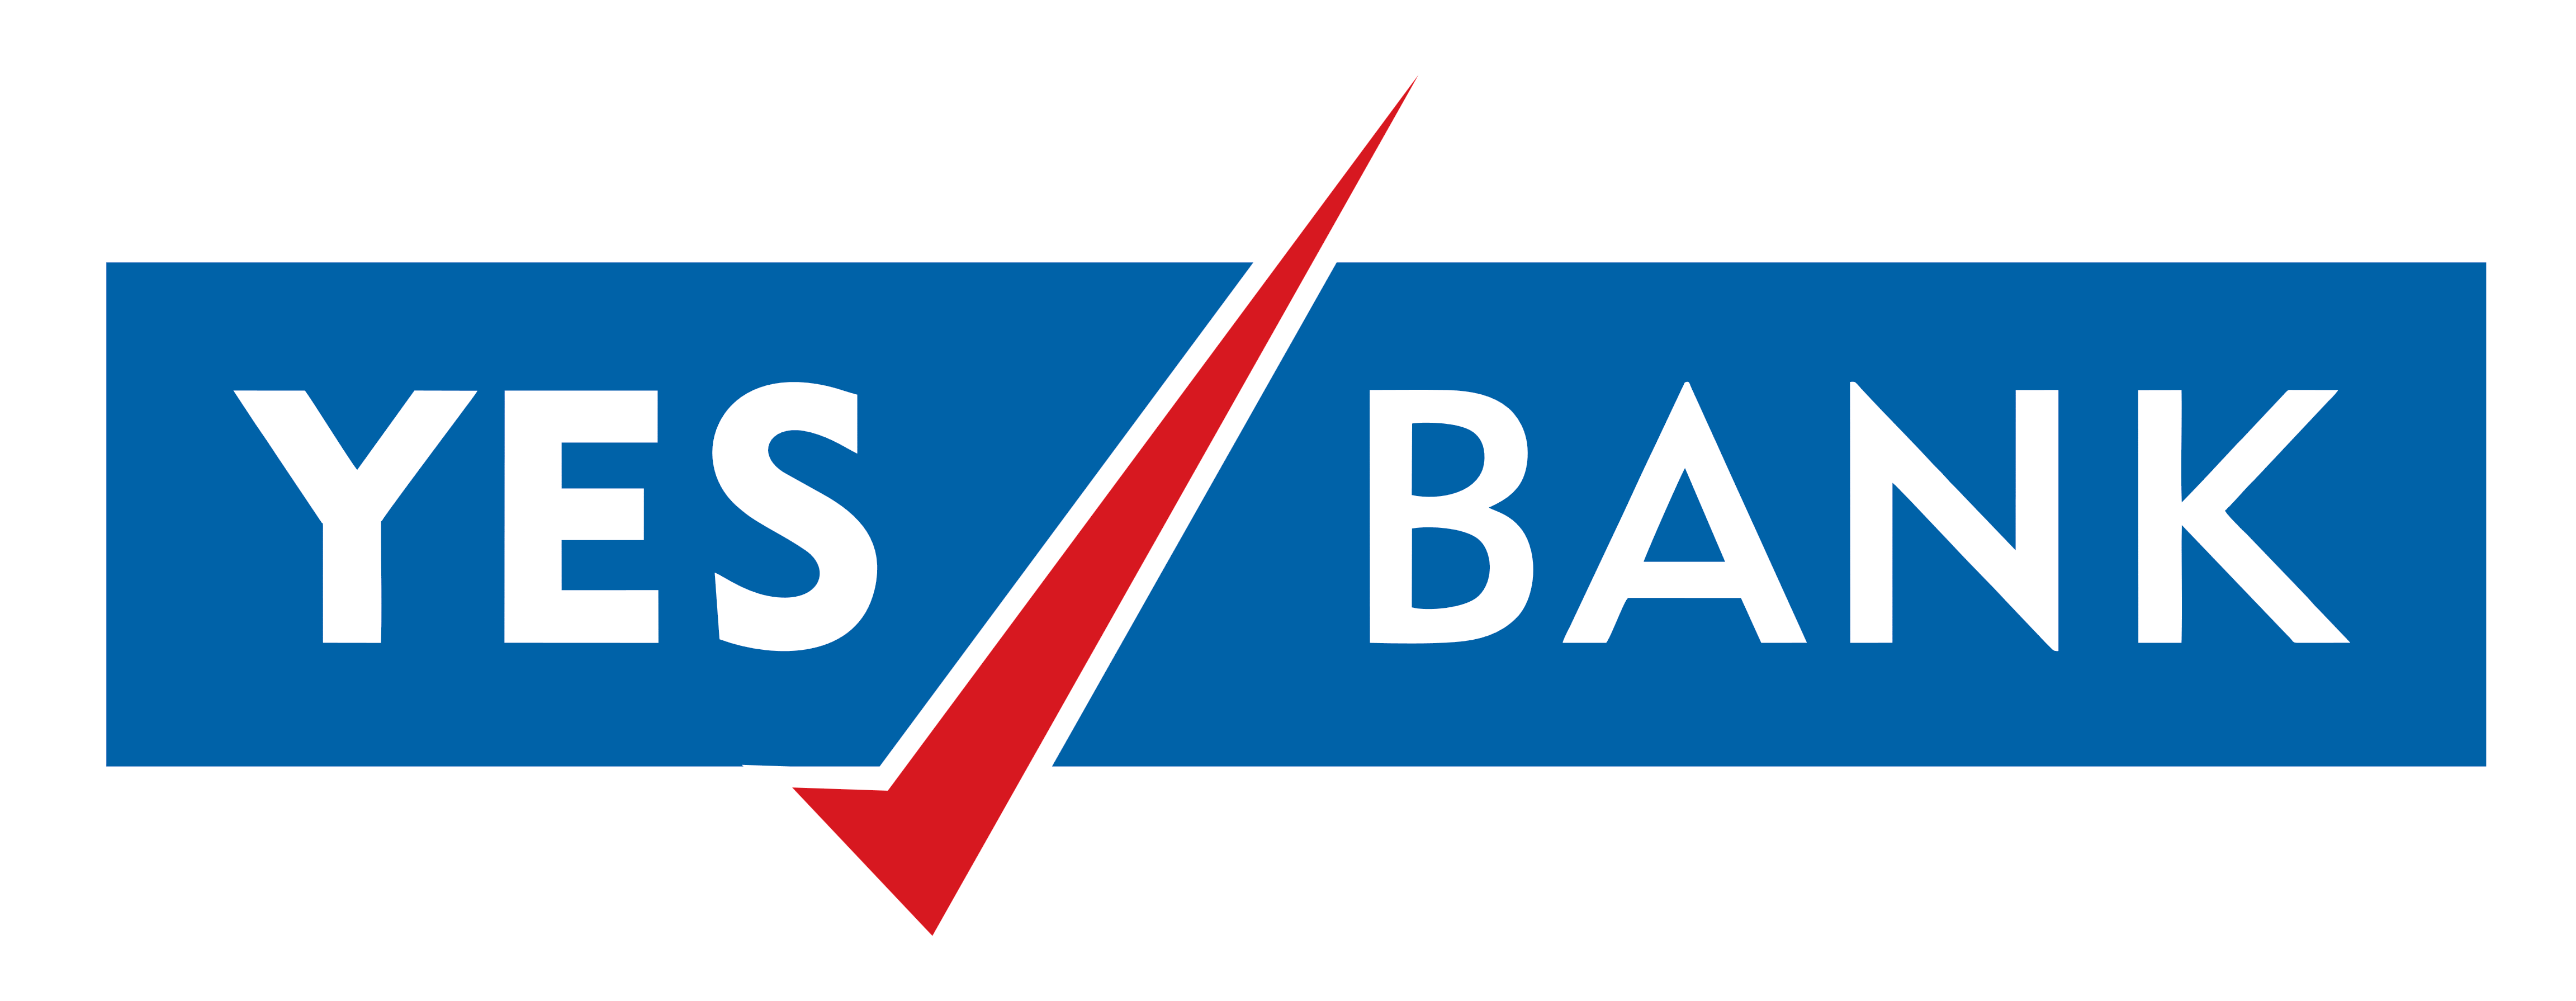

## Problem Statement

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.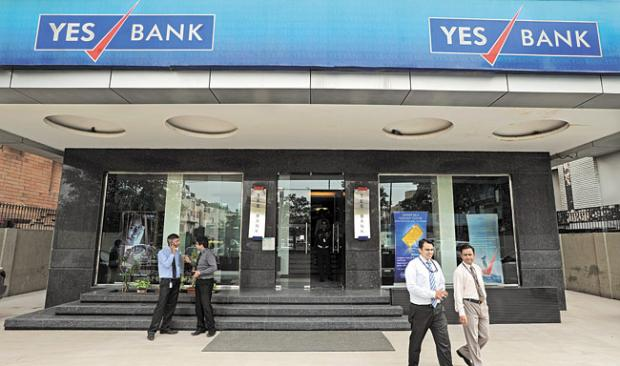

# Let's Get familiar with whats does the term stock means?

In finance, the term "stock" refers to a share in the ownership of a company. When a company decides to raise funds, it can do so by issuing stocks, which are also known as "shares" or "equity." Each share represents a small piece of ownership in the company.

Investing in stocks can be a way to potentially earn a return on your investment, but it also comes with risks. The value of a stock can go up or down, and there is no guarantee that you will make a profit. It's important to do your research and understand the risks before investing in any stock.

Since, we've the YES BANK Stock price dataset which has the monthly stock prices.                       
**It contains the following features:**

**Open** - The opening price is the price at which the first trade for the day occurs. It is the price at which the stock is first bought or sold when the market opens for trading.

**High** - The high is the highest price at which a stock traded during a period.

**Low** -The low is the highest price at which a stock traded during a period.

**Close** -The closing price of a stock refers to the last price at which a stock was traded during a regular trading session. It is the final price at which a stock was bought or sold before the market closes for the day. The closing price is calculated based on the weighted average price of the last half-hour of trading.

# Lets Start !!

In [ ]:
#we will start with importing different libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from datetime import datetime


from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from xgboost import XGBRegressor

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset

bank_df = pd.read_csv("/content/data_YesBank_StockPrices.csv")

# Data Overview

In [ ]:
bank_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
bank_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


## Rows and columns count :

In [ ]:
bank_df.shape

(185, 5)

It has 185 Number of rows with 5 different columns.

## dataset information

In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


Hence the data looks fine , seems like no null/missing values present.
we need to convert Date column data type to datetime data type.

## Statistical Features of dataset :

In [ ]:
bank_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


NOte : Mean & Median values seem a bit deviated from each other in each column which implies that the dataset maybe skewed.

## Knowing your dataset : 

### checking Null Values :

In [ ]:
bank_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Hence there is no Null values present

## Checking duplicates count : 

In [ ]:
bank_df.duplicated().sum()

0

There is no duplicates present in data.

In [ ]:
# Changing the "Date" column to datetime object.

bank_df['Date'] = pd.to_datetime(bank_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


Date column data type is converted now

## ***Understanding your Variables***

In [ ]:
bank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

Variables Description :                     

Date :- The date (Month and Year provided)

Open :- The price of the stock at the beginning of a particular time period.

High :-The Peak(Maximum) price at which a stock traded during the period.

Low :-The Lowest price at which a stock traded during the period.

Close :- The trading price at the end (in this case end of the month

We have 185 rows and 4 columns in our dataset with no null values. Here our dependent variable will be Close, and independent variables are - Open, High and Low.

In [ ]:
#copying data to preserve orignal file
df1= bank_df.copy()
     

In [ ]:
df1.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


## **EDA AND Data Pre-Processing**

# ![eda](data:application/octet-stream;base64,iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAYAAAD0eNT6AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAOxAAADsQBlSsOGwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAACAASURBVHic7N15nBXVmT/+z3NOVd2tV2iardkRhQYUW4QWNbhFjXFiFrKYPRlNvkmMIqjJb5IZkkkyGhdMzDZmmySTTDLZ993RRAU07oIbsnbT0A1Nr3etqvP7o0FRm75Vd6tTt5/3vJgQUvfep/veW+c523MAxhhjjDHGGGOMMcYYY4wxxhhjjDHGGGOMMcYYY4wxxhhjjDHGGGOMMcYYY4wxxhhjjDHGGGOMMcYYY4wxxhhjjDHGGGOMMcYYY4wxxhhjjL0cBR0AYyy/9va1MXVYTVYkppBAMwENikQDKdWggAYQGqCoDqTqFWCRQgJAggBLAfUAxDFPVwvAeNlL2AAGj/nvLgH9CpQBVFIRhgnIQlE/SA1AoY+APkXUR8rtUxCHlev2SFCXanC7N23amCrzr4QxViROABgL2BlL1zc7Ss2AQy0kMItczFCkWgA1A6BmAFMB1AQdp09DALoA1Q3QXgXsJaIO5WI3pOqwjOyevz9yR0/QQTI2nnECwFgFnLXsqkm5XKSVgHlQaj6A+QqYB2A+Rnrk49EAgOdBtJ2Ueh5E20HO9mxGbH3o2VsPBh0cY9WOEwDGSmj1Kdc0pHJiGYBFBNEKYBGgWgE0BRxa2BwE8CRATymoJ4loW9SwH7370dv7gg6MsWrBCQBjBWpbeM1US4o2pegUAMuO/JkTcFhVjYAdCngUwCMu0SOOYz/80FO3dwUdF2NhxAkAYx60tV1pGtnapVA4Uyi0KaANwKKg42IAAV0KeAhED8HBvdTg3MeLEBnLjxMAxkZx5pKPNdqufSZIvQoKZ2Gkd28GHRfzJAfgYVL0d0X4W9S0/85TB4y9EicAjAFY3fqhmpSKn0dCnQeFVwFYjJdunWPh5SrgcVLqbyDxl6TEXY8/fstw0EExFjROANi4tXzJ2rnCFecTcCmACwBEgo6JVYQNqC2A+LUS6i9bnrj1YQAq6KAYqzROANi4sXTp+kQ8h3aQeykIlwE0M+iYmBYOEPAnKPXriOX+macL2HjBCQCramcsXL/YFbgEUBcBWAWex2djywG4F8AfHOX+9sFtG7cGHRBj5cIJAKs6py9dP0c4eDOg3gVeqc+Ksw1EPwbsH21+8vangg6GsVLiBIBVhZUnXTNbGfJ1pNQagFYFHQ+rSttA9GMpxP/c9/jnnwk6GMaKxQkAC60zW2+YmSP79Uca/TPAn2dWOdtA9GPl0Pe3PHXzc0EHw1gh+IbJQuWMpeubXcd9B0BvBbA86HgYA/AAgB+aVva/+YAjFiacALAQ2CBWLhw6l4R6lwLeBCAWdESMjSILol9C4XszFu3+3Y9//GMn6IAYGwsnAExby1uvmyKh3g2oKzBych5jYdEBqO8bML9y79ab9gQdDGOj4QSAaWaktw+JK6HUZeBteyzcHBD+j1x1Z6S57ud3373BDjogxo7iBIBpYfnia2cIRf9MwPsAtAQdD2NlsBdE33LgfvPBJ2/bG3QwjHECwALVvujaZSBaq4C3ATCCjoexCnAB/E656rNbnrptc9DBsPGLEwAWBFq5cP15EOpqAK8NOhjGgqPuI4UvtLTu/RkvGmSVxgkAq5iL518V6YuYb1GgG8AV+hg71nZF+JKode/ctGljKuhg2PjACQAru7YF65pMk94PqI8CmBZ0PIxprBtEX81l1ZceevbWg0EHw6obJwCsbJYvWTtXOuI6EN4N3rvPmA8qCdB/wXFu3vz07buCjoZVJ04AWMktX3ztDOliPYg+ACASdDyMhViOgB86kv7tgcdv2Rl0MKy6cALASuasZVdNymXNdQBdDSAadDyMVZEsAf8lbPmp+575/L6gg2HVgRMAVrSROX61HqCPgof6GSunDAHfsSH+7cGtN+8POhgWbpwAsIK1t66doEh+FEqtBVAXdDyMjSPDgPoSQX1+09aNvUEHw8KJEwDmW1vbDfVmxlnLDT9jgesn4DY3k719y/Y7BoIOhoULJwDMhw2ivXXgHQp0M4DmoKNhjL2gVxE+PXPhni9xQSHmFScAzJMVrdeeQ6DbASwNOhbG2PHQUwTn2k1bN/4h6EiY/jgBYGM6s/WGmQ7szyjgnUHHwhjz7DeOcK9+8ImNO4IOhOmLEwA2qqVL1yfiLq6DUjeAt/QxFkZZKPU1lc19ktcHsNFwAsBejtpbr32nAt0EYErQwTDGikNAlwtsmLlozzd5fQA7FicA7AUrW69bBXK+CEWnBh0LY6y0CPQPEvjo/U/csinoWJgeOAFgWDH/qjqyzH8H0UcAiKDjYcdHRCBFI/9JBHHk7yCCAEAgEARAL365iV78mhNe+XcF9cK/veTvSh35t5H/p6Cg4MI9+u9KwSUFpY78OfJ3pjVFwNfdTPY6nhZgnACMc6cvXn+JUOqrAGYEHQsjEAGCBATEkf8kCKIj/52g+1dWAVDKhQsF95j/VGokcXBHrgg6zHGPgC5F+MjmJ2/9WdCxsODofTdhZbNi8dWThTJu5tX9QSAYJCBJvLSxD0EDX6wXEgSl4MKBoxRc5cBR7ktGH1jF/IYM94ObHtvYGXQgrPKq+27DRtW+6No1iuirACYGHUu1O9q4G0cbe5KQ46ChL4R7JDFw4MJRDlzlwlEueMSgvBTQB+CGLVtv/Tr4lz2u8F1oHFm+ZO1c6YqvAbgg6FiqkYCAJAkp5As9fP6KFUvBUS5s5cJxbTjKhQs36KCqkiL8Tdnqigeevu3ZoGNhlcF3p3Fg9eoNRurg4IdJ4TMAaoKOpzoQ5JFGXpI88ofXT1bCyMjAyLSBoxzYPEpQSimAPjVj0e5beMtg9eMEoMqtPOma2ZDyewDODDqWMCMAgiQMMmCIkUaf+OujBXVk2sB2bdjKPjJtwIr0AMF9+6atG7cHHQgrH76DVbH2RdeucYnuJKAh6FjCiIhGGnySMISE4B2SoaDgwnYd2MqBrewXti0y3wYVsH7L1lvvDDoQVh6cAFShkeN67S9D4e1BxxImL/byX+zp81ck3BQAVx1JBlwbjnJ4ssAnAn4CuB/YtHVjb9CxsNLiu1uVaV987RlK0X8DmBN0LGFhkIQpTJhCjhTRYVVLwUXOdZA7Ml3AvFJ7SKh3bXpi4z1BR8JKhxOAKrF69QYjfXDoE1DqEwBk0PHojABIkjCECYsb/XFLQSHn2pwMeKeg1B2DVHfd1q0bskEHw4rHCUAVWLX0+hMdx/k+gLagY9HVsY2+SRKCV+yzYyilkFOcDHhBoH84jvt23i4YfpwAhNzK1vVXAO7tAMWDjkVHggQsYcIi8yU18Rk7HvfIjoLskTUDbFRDROrqTU/e9q2gA2GF4ztiSK2evSGaTgx8CaD3Bx2LdggwaaTRNwTPhrDCOcpB1s0h69rgWgOvRMD3UOd+YNOmjamgY2H+cQIQQssXXztDKvoJgNODjkUnkiRMYcASJu/RZyV1dIog6+Z4VOCVHnElvfGBx2/ZGXQgzB++S4bMitZrzyHQDwE0Bx2LDogIJo00+pK4t8/Kz1Eucm4OWTfHBxi96JAicfmWJ2/+U9CBMO/4jhketLJ1/Q0E/BeA2qCDCZoggaiMICajMIXJi/pYxQgiGMJARI587lw+yRAA4gR1ecvkVaKj+9V/A+4e97+QMOARgBBYdeL1tY7hfhtQbww6lqBJkiOL+oQZdCiMARhZGeAoG2kny9MDI34dNZ133f3o7X1BB8LGxgmA5o5s8fsZgEVBxxKUkS18BiLC4kV9TGuOcpBxc8jxosFnHeW+4cFtG7cGHQg7Pk4ANNa+6No1iuhbGLcn+BFMYSAqLB7iZ6HiwkXWySHrZsdzGjAIwns2P3nrz4IOhI2Ou1OaWrF43dUAfR1AJOhYKo8QERYSMjayop/377OQIYysEzCFBaKRI4zHoQiAN7dMXkUd3fffHXAsbBR8Z9XM6tUbjHT34B0gfDDoWCqPYAkDERGB4EafVRFXKWTd7LjdOaAUvmXHBj/40EN35oKOhb2I77IaGVns5/wIwMVBx1JJBMAUJqIiwr19VtUUFDJOFhmVHX9LBAh/yUWMNz300E39QYfCRvDdVhPtJ6+d7triNwScEnQslXNkjl9aEHwgDxtHjq4RyLg5jKtMgPCkoYxL7t16056gQ2GcAGhhxeL1S0mp3wJoCTqWSjja449ww8/GORcu0k4WtpsbN2kAAV2uwKVbnrj1oaBjGe84AQhYe+u6CxXwvwDqgo6lEiRJxGSEq/YxdgxHuUi5aTjuuKkjMESk3rbpydt+E3Qg4xnfhQM0cpIfvg8gFnQs5SZAiMooYjLCW/oYexlBBEuMHF7luOOisqAF0FumN7cf6uzZ9GDQwYxXnAAEg1a2rrsJwI1AdY+BE4CosBCXcUghwYNOjB2fIAFLjmx9dap/66Ag0GumT26PdHZv+mvQwYxHfDeuPFq56NrbQfTRoAMpN1OYiPHKfsYKopRC2s0gNx7WByh8bfO22g8DG6o+69EJ35kraM2aNXLvUzO/DoX3Bh1LOfE8P2Ol4ygHKSdT/ecMEL4fbap9z913b7CDDmW84ASgQtrarjTNTN33odSaoGMpFwIQkRFEhAn+aDFWOgpAzs0h5WRQ1dsGFf43Fxt8BxcMqgy+S1fAxfOvivRGrR+SwmVBx1IuhjAQE7zAj7FycpWLlJOBraq3k0zAb1Hnrtm0aWMq6FiqHScAZdbWtiFupgd/AeCCoGMpBwIhKiN8PC9jFTQyGpCFQtVOmd8tbflP9z3z+cGgA6lmnACUUVvbDfVmOvdbgFYFHUs5mMJETFqg6t7IwJiWFBTSTgZZt2pHy+/NRY3Xcung8uEEoEzOXPKxRtvN/R7AiqBjKTUiQlxEYQgj6FAYG/ds10bKzVTniYOkHs5l6cKHnr31YNChVCNOAMqgbcG6JtPEXQCWBB1LqZnCRFxGwB8dxvRR5aMBT7iOdc4DT//HoaADqTZ8Fy+xFfOvqhORyF8V1GlBx1JKBEJMRmDyXD9j2sq5NlJOuuoqCSrgUVOY5977xI2Hg46lmnACUEJtbRviRmbw96RwdtCxlJIkibgR5YN7GAsBpRSSTrrqdgooYFMMqVffvfUrQ0HHUi04ASiR1tYNVi2Gfgmoi4KOpZSiwkJEWuCPCmNhopBxbWScdJWNBeCv0eHa1969a0M66ECqAZdqK4G2tivNmI2fAXhN0LGUioBAwogdGfLnxp+xcCEYJGEIA45yqmlKYK5t5U5bUt/2k+29D1R5acTy4zHdIq1Zs0aa6drvAnht0LGUiiVM1JhxLuXLWMhJkkgY8Sqr06EuOhyxfrB69QbehlQkvsMXh+ro4v8E8K6gAykJAmIyiqiMgLjXz1hVIBBMYUAIAcetmnUBC+1kdlZHz4W/Au6umuGNSuMEoHC0snXdlwB8IOhASuHFIX9OqhmrRvLIlIDtVs2UwCnTm7NNnT2bfhd0IGHFCUCBVrauuwnANUHHUQoGSSTMONfxZ6zKCRKwhAlHOXCrIAkg4PSWSWdYHT2b7go6ljDiBKAAK1rXXUnAjUHHUQoRYSFuRHnIn7FxgohgCQMEVMcRw4Szpje3H+zs2fRg0KGEDd/1fVqx8NrXkKBfAgj1WDkX9mGM2crGsJ1GFRwx7ADqDZu33varoAMJE04AfFi58LpTIdx7ANQEHUsxJAnEjRgX9mGMwVUuhp003PCPBgwKiLPv33rzo0EHEhacAHjUfvLa6coWmwG0BB1LMQxhICGj4LeeMXaUwpHqgeHfJbDPIbXywSdv2xt0IGHAXUAPVsy/qk7Z4ncIeeNvCZMbf8bYKxAICRmDJaygQynWNEPR79vabqgPOpAw4AQgj7a2K02KWD8BsDToWIoRFRZi3PgzxsYQkxFEZTToMIqigFYjbf+ICwXlxwlAHmaq9osALgg6jkIRgJgRRURGgg6FMRYCEWEiLmOh7isQcGG6Z+BrQcehO94GOIaVres+AcL1QcdRKAIhbsRhEifCjDHvJAmYZMBWdoj3B9CpLc2r0h09998XdCS6CnGOV17ti65do4h+hJD+jo5W9uPiPoyxQo3sEEjBVW7QoRRKgfCmzU/e+rOgA9FRKBu3cmtfsu4k5WILgLqgYymEIIEaI87FfRhjRVNwMWynw1w0aMhR7soHt23cGnQguuHu4cusOvH6WuXSzxDSxl+SRI3kxp8xVhoEgRojFubTQWskiZ/xzoBX4gTgpcgx3G8DamHQgRRCComEjIGIG3/GWCkREkYMRngPC1tgpXPfAY96v0RoU7pyWNm67hMAPhx0HIUYKfDDjT9jrDxGjhU24cAN6ZoAOqml+YxkR88mXhR4BLcWR6xcuP58CPUHhDApMmik8ed3kzFWbgpAykkj5+aCDqUQLgGv2bT11j8GHYgOuMkAcMbCdbNcgX8AaAo6Fr9MYSDOBX4YYxWlkHQyYU0Cel1Jpz3w+C07gw4kaON+DcDq2RuirsBPEcLG3xImYjIGbvwZY5VFiMsIrHCeJjpBOOqn7e1rY0EHErRxnwCk4oNfBtAWdBx+jTT+EW76GWMBGTlSPKRJwDJ3QI77SoGhm+8upZWt668gwr8GHYdfPOzPGNMDwRAGXKjQLQwk4OSW5vbdHT2bxu3xweO2BWlvXTtfQTwCoCboWPw4utqfMcb0Edo1AcOuo0594Onbng06kCCMyymAtrYrTQXxfYSt8SfjyHG+jDGmE0JMRmGGr05AQkj6QVvblaGcxyjWuEwAzHTNvwM4Peg4/JAkETd42J8xpicCEJNRGOGrGNhmpmtDNxVcCuOuNTl90XVnCXL/DyFa/yBJImHEuLwvY0x7CgrDdipsZwe4IDpv85O33B10IJU0rlqU1adc05DOiccAmhl0LF5JEkjwwT6MsVBRGLKTcMK1MLDDEObSe5+48XDQgVTKuJoCSOfkV8PU+I8c6cuNP2MsbAhxGQ/bceQtjpu7M+ggKik0w+DFWrFo/XuJ8C9Bx+EVgVBjxiHGV47GGKsSRASTJHKuHXQofiyaPrn9+c7uTY8HHUgljIuu5fIla+dKVzyC0BzxS0jIaJhP3mKMMQCA4zoYclIYOUUgFIYI7rJNWzduDzqQcqv67uXq1RsMqcT3EZrGH4jJCDf+jLGqIIVELFzbl2sU6L/WrFlT9SPkVZ8ApHsGr4XCyqDj8CoS3tKajDE2KksYiAor6DB8oFV7t824Ougoyq2qpwBWnnTNbEj5JIBE0LF4MVLfP1SZMmOMeRS2aoEqKUguvf/Jm58POpJyqeZxZoKUdyIkjb9BElFu/FkVM4lQbwhIemm/Y9hxMeSEarsYK8jICYLDcGG7YagRQHGl3DsBnI8QLWDwo2pHANoXr3+/UuobQcfhBe/1Z9Wk2ZKYG41gTszE7IiFJlOiwZBIyOPPOOaUwsGcgz7bQWcmh53pLJ5P5bA3nUUYmgrmh8KgnQzN4UEE9e5NW2/7btBxlENVtjjLW6+bIuFuA9AYdCz5EAg1RgwifOUzGQMAWIKwNBHFqbVRtNXGUC9L91nOKYVnkhn8YyCFB4dSOJTjdKAaOMrFsJ2ECkfHuleRvWjLk184EHQgpVaVUwAG3DtUCBp/YGTFPzf+LGwIwKJEBBc01qKtNgqTytOXMImwOBHF4kQU70YDdqRzuLdvGPf0DSPphqLxYKOQJBCTUSSdVNCheDEBytgI4PKgAym1qhsBOH3x+kuEUr8JOg4vIiKCqAzTylg23lmCcG59AhdMrMV0K7j+Q9pRuKd/GH88PIh9mVAVmmHHSDsZZNxs0GF4pF63eettvwo6ilKqqgRgxfyr6ihibQXQEnQs+Rji6NG+VfUWsCplEHBOQw3eOKkeDYY+u4cVFO7vT+F/uvtwkKcHQkcBSNop2CoUSdy+XNRY9NBDN/UHHUipVNXY84wpZ90OwrlBx5GPIIG4jIHKNGzKWCmtrItj3cwmnFWfQFTo9ZklEGZGTZw/oQYxQdiRziGneGogLAiAKQzkXDsM6wFqpeMmOro3/T7oQEpFr29zEVa2XrcKcP8G3YsbEVAj45A8788012AIvHfqBKyojQUdimd9touvd/XiocFQzC2zIxzlYNhOhSEJcJWrVm156rbNQQdSClXSCm0QM5qzPwUwPehI8okbURhUlWsvWRU5oy6O62dOwtxouNaoRAVhVX0cjYaBbck0bO3bEwaMjIoSURimAogETu3ovvAbwN2h/3RVRQKwsrXt/QA+GHQc+VjCREREgg6DseMyCHjPlEZcPrkBEc2G+/2YG7PQXh/Hk8NpDHCRoVCQJKGg4GhfH4CmtjRnd3b0bHos6EiKFd5v+BGrTry+1jWcZxQwNehYxiJIoNaII8y/csc0sGfVKTgwdxaS0RhsEGYmCDKdQbzjAGqf3YPap3aBXN2/wGw0tVLg6paJWJyonoqUaUfhi/sO4WGeEggFBYVhOxmCJAAHVCa7YMv2OwaCDqQYoR8BmDZl5WcAXBh0HPkkjBgE6b08YSy720/Bw5ech55Jk5AxTLhHEpna+gicWATpyRMwsGgO+pbMhzUwjMjBvoAjZn5MtQx8as5kzA7ZkH8+hiCsrI9jyHHxfCos283GLwJBkkTW1X4qoIakVB09m+4KOpBihDoBWL5k7Vyh6LvQvKBRVERghvSEP0WEx9ZciN3z5mK0nLwu/tJfvRuLoH/RHLjRCGp2dFQmSFaUaRED/zqrGRPNUN8OjksAWFYTO1JVkJMA3Y10lBQcpfm2TsLpM5pX/rCjZ3Nv0KEUKrxdUgCGS7cB0HpS3SCJiAxn4w8Aj73h1Tgwqdnfg4hwaOViHDh3eXmCYiUzzTLxyVnNaKzSxv9Yb2tuwD811QUdBvMgIiMw9N8pFVGQNwYdRDG0/w0fz+mt688l4HNBxzE2QsKIgUI69L/3tMXYdeL8Ma95+QjAsZIzpyC2/xAih6qmbkZVmWhKfHrOZDQaob0N+LY4EUG/7WJHmkcCdEYADCGR038qYFFL06r7Og7evyPoQAoRypZpzZo1UkBtDDqOfGIyGtp5f1cKPLf85KKfZ/+rV0JpVDmOjYgKwvUzJmlV1a8SCIT3TW3EKTXVs9CxWgkIxKTWA7wjhLplzZo1ocyiQ/nt37Nt5gcALA06jrFYwoQltF6aMKa9y5cgV4LkJdtYi8H5M0oQESsVIuAj0ydiVlSDqakAph4ERn7+yWZ4v5/jhSnMMKyfOnnPtpnvDzqIQoRuT1pb2w31ZtreDqAp6FiOR5BAjREHhe/X+4It77wMfbW1ea9racqfodc/8Txafv5/pQiLlcDrm+rwlub60j+xFBDNtZDNtRBNNRCTakATExA1UVBdFFQTAcVMkGWM2vCrrA3kHKihLNRgGu5QBmooDbdnaOTPwUG43YNwDw6hFAXj9mRy+MTOA8jyqYJaU1AYyiXhjroMWRvdKpM9IWzbAkOXAhtp+1po3PgDI0f8hrnxB4Dh2kTJnis9ZULJnosVZ3bUwhsnlWAhnBSQcybCmN8MOXMC5MxGiJZGUBE9erIMwDJAiQgwufa4C5RUKgdn72E4e3vh7DoE59luOJ19gM8zAGZGTLytuQHf2X+44JhZ+REIURnR/ejgZkTMqwH8e9CB+BGqBGD1Kdc0pHL4aNBxjMUisypK/TokStLLAgC7rqY0T8SKYhLw4WkTYBRyCJUgGPObYZw8HcZJUyDnTgJZwUx7UsyEsaAZxoIXd6eoZBb2c92wn9oP+7EOOHu87cy6qLEGWwaTeHo4U65wWQmYwoCpDK0XBRJoXXvr2i9v2roxNNsCQ9VSZXLyBgIago7jeIgIUSMEi1Y8KOWoqBPRfg5vXHjDpHrM8DHvT1ETZttMmKfOhLFk2kjPXFMUt2Ce3ALz5BbgrafBPZyE/VgHcv/YjdwTnYA9+vAxEXDllAm4Ycd+PkVQc1ERhe0mofSdCqhXEGsBfDLoQLwKzTh124J1TaaJHQDyT0wHJC6jYViw4skfP/ROT9d5WQMAAK2f/kYx4bAiNZkSG+dPhZmv929KmG0zYbXPhXFyS1FD+rpQyexIIrB550gyMEp2+6Oefvy8J1TTt+NS1s0h5aSDDmMsQ0LSvPsfv6U76EC8CM0IgGnSxwGlbeNvCKNqGn9Wfd7a3DBm4y+n1cM6+wRYqxeAaqtrixzFrZGf7ewT4B5OInfvdmT++gzcnsEXrnndhDrcdXgY/bbm1efGOUuYyLk52PpWCaxxHbUOwA1BB+JFKNL7toXXTJWE7wKkZQtLRwv+hGdAJa/nPdYAGKsQ0LGa73m4mHBYEeZGTbxnSiNe0f4TwVw+G/ErViH2tuUwTpwMioSmT1AQipkwTpyMyIWLIOc0QfUl4R4cgnHk5MMnhrXuXTKMVFfV/KyAU6ZPPv2bnd1bhoMOJJ9QfNsNIf8FQDzoOI4nIiMQ4SypwMaBy5rqX9L4kyVhvWoBIhe3Qkwep6VxiWCeOrK+wdlxEOnfPoELN+/E7w4N4jCPAmhNkEBUWkg72i7cTEDJjwFYG3Qg+Wg/AnBm6w0zFdxvQ9NkRZJETEarqO8/gkcAqkOTKfG+aRNG0lMpYJ2zAIlrzoPVPhdUo++ivkoSjXFYK+YgunIOml2F+7Z2lmwHDCsPgwRs5UBp+kYR6JTpU8/6TueB+7ReWKJ9t9VG7hPQ+MCfkT3/jOnp1Y01kESwXnUC6ja+CfH3r4Jo1HYwLVByegNedd2F+PIPrsRpZ4x9BgYLGuleJjhKjvPxoIPIR+sRgJHjfsU3oGmcI+V+q+v89KN4BCD8TCKsW30S6q8+F5FXLwLFq/OzWmqNTTU495KlaF02E9uf6kL/4WTQIbFRCBJw4cJV2m4LPHlm0xnf23twk7anoWk5rH6UUPJ6QGm58A8gRIXWGSgbxxon1uDfPn4Jms89KbDNvkop5HK5kT+2DcdxYNvOyA1bKTjuizduKSRAgBQCUhowDAlDGrAsE4ZhgAopXlSkBJL9SwAAIABJREFUZSvm4ss//CB+8YPN+N5X70Ymnat4DGxsURmB7Wo7FWC5Qq0HcFXQgRyPtqPXZy27alIua+0GEAs6ltFERQQRWb09Kq4DEF5nXbAIV/1/l6CuoXJD/el0Bql06sh/ppHJZGDbNlQJiusQEUzTRDQSQTQaRTQaQTwWg2VV7vu3v7MPd3z2N3ho0/MVe03mTcbJIO3qeryzSrpOZOYDT//HoaAjGY22IwC5jPkhkJ6Nv4BApEqH/ll4TZpSh2s3vA7LVswt+2ulUikMDg1hOJlEMpmC45Rv5bxSCtlsFtlsFgODL+7dNwwDiXgciUQctTU1iETKNyI3ZXoDPvuVd+DPv3oUX/38H5Dk0sHasKSFrLI1nQqguDAyHwTw2aAjGY2WIwAXz78qcjhi7QIwJehYRlNNFf+Oh0cAwuXM8xbi6k9eitr68uTMSikMDg2hv38Ag0NDsG399mFbloXamho01NchkSjdYVYv193Vj5s/8XM88fDusr0G8yfr2kjpe1hQd3S4dtbduzZoV2RCyxGA3oj1btK08ZckYQotf21sHIrFLXz446/B+a/1tmjTr6HhYRw+3IeBwcGy9vJLIZvN4lBvLw719sI0DNTX16OxsQGxaGkrGzZPrcdNX383fvD1v+EHd94Dl48TDpwlDORcqWuFwOZMzdDbAXwz6EBeTsfV9TSjedX3AEwKOpCXIwBxIwZB2u+eLBrvAtDf9JkT8LmvvhOnrpxX0ue1HQeHDvWio7MTBw8dQjqdLslcfiW5rotkKoXe3sMYHBwCCIhEIiVbTEhEWHrabCxpm4V/3L8d6RQvEAyaJIGcq+f7oIATO3su/Apwt1ZfJO1aspWt114KqIVBxzEaU5iQpGPOxMabFWcvwBf++wrMnt+c/2KPstks9nXtx9PPPIuuAweQyeq6sMqfZCqFjs59eOqZZ7Gvaz9yudI1EktPm407vn8lTloyvWTPyQojScLUs1o8CDjx9MVDFwcdx8tplwAoonVBxzA6qupV/yw8Lrt8BTZsfCtqSnRoTyaTwZ69HXj62edw8NAhuK6Oi6mK5zgODh46hKeffQ77uvaXbB1D0+Q63PyN92L1RYtL8nyscDrfo4VS2rVtWnVnT1+89jShSMvVkpawYFX5wr9j8RSAfoQgfPjjl+DyK84uyVB2LpfDvq796OzqQjqt3fqkskqmUjjUexiO4yIei0GI4vpCUgqsOm8hiAiP/2NXaYJkvhERXKXgQsskds6M5pW/7+jZ3Bl0IEdptZpNKLE+6BhGR4jI8dP4M/1EYyY+ectb0HZG8fP9ruui5+BB9Bwsb29fCIWYGEAUBxGxD8JwBiHUAKQzCEBBqCSIFBQkXEQBknCoFq6sRU7WIS2akcYEpJwalGPD0tHfw+G+PkxpbkZjY0NRiRUR4R0feBUaGuP48k2/h+LFgYGISgs524aOBzoo0NUA3h50HEdpkwCc2XrDTBv2G4OOYzQRYfBpfyww8UQE/37H5WhdNrPo5xoYHETnvq6SzoOPcFFvdqE+vQ0RewcM0QGj9iAgj6zKLmKLvsoacIYnI6dmIB05Af3GIgzaE0sTNgDbttGxbx8O9faiZfo0xGLFbaV87ZuXI56I4NZ/+yUcR8ueaFUTJGAJE1ktiwPRm5cvvvZjDz55296gIwE0SgBysN9PGsXzAhopNMFYEGrqovjMl95R9CIz27axr2s/+vpLV5a81uxDQ/YJxDKPw4o/A7LSQBm+KmTZMKxOGOhEDJvRCMB14simT0AqshT9xokYtItfDJlKp7F9x040TZyIyc2TipoWOPeSpYjXRPG563+MbFa/mgnVLiJM5NycjiWCDenifQA+FXQggDZrADaIGc2Z/wKoPuhIXi4irKov+jMaXgMQvJq6KG76z3djQeu0op5ncGgIu3btRjJVfKGUuBzAtNxfMV19ExPiv0LUehxG/ADIrGwjR2YORuwAYtbjaDDuQlN6E+KUQ8acAtstLgtJJpPoHxhEIh6HaRbeJ2mZPRFzFkzGvX/ZxrUCKoyIoKDg6FgXgGh+++qWL27bti3wD4UWCUD74lMvAej/BR3HyxEIcSMG0rNgYllxAhCsWMLC577yzqIaf9d1sa9rP/Z17S9qrt+SWUxV92Na9ntoqvkJItGnISJ6VV0TkSQi1lOYKP6MxuFnYZkRJGkSVIFTd47j4HBfH4QgJOKFn6nQMrsJ02c14f67nkLISimEnhQCGVfL0Ze6ge76zR09m7YHHYgWQ+5K0RVBxzAaS5jjsvEfj4RQmDtnEDOmDWPatCSmT0uisSGLRCKHaMSBIV24SiCZkkinDPQPmti3L459XXF0dsXx3PN1yGRKk09HoiY+/YXLixr2z+Vy2L1nb1G9/qgxjCnJP6Mm/ldQIgOUr7pu6QgX1oSn0YSnMTEVw5B9HvZZFyHr+B8VUEqha/8BDA0PY2ZLC6Qs7P191YWtSKeyuP3Tv+IkoIIIAhFhIqPjWgBSVwD4fdBhBJ4ALG+9bgrgalcggQA+8KfKzZoxhPbTe9C66DBaT+pDLFZ4b8F2BJ7dXocntzbiH49MxJNPNUK5/pNHEoTrP/N6LGmbVXAsg0ND2LO3o+DSvQmjD1OSv0Usch+oUcselCcUS6E29hssyP4RQ+lzsC/6GmQd/735wcEhPPf8DsyeOQPRAssKX3jZMvQeHMJ3vnxXQY9nhYlIC1kt1wLQpW0Lr5n60FO3dwUZReAJgCTn/VD6lW8yhRnIGeSsvCZOTOO8V3Vh9Vn7MWfWYP4HeGRIF4tO7MOiE/vw5jfsxMFDUdxz3xTcdfdU7NhV6/l5rlj7aqw6r/BCmId6e7Gva39BpXujchgtyR8iFnsQaKye1etk5VBr/QkLsndhcPhcdCZeB9vxd8vJZrPYvmMnZs2cgdqamoLieNs/n4X9nYfxx188UtDjmX8EgqnnjgDDFMa7ANwUZBBBrwGglklnfAvAhIDjeAkCEJexcZ0AVNsagGlTknj7W57H+o8+idOWHUJjQ3lvCPG4jUUn9uGSCzuw7OReDAxY6OyKY6z97Je+ZTne/aFzCn7Nrv37sf9At+/HESlMy27CdPkFmHW7AdKtt1QaJF1E4s9jQvIeGKIRQ2jx9XilFPr7B2AaRsFbBZefeQKeerwD+zsPF/R45p/Q9IwAAuZ29Gy6I8gYAk0AVixedwEBVwcZw2hMYY6rqn+jqZYEYPrUYaz9yDZ86IqncNKCfkhZ+catuSmN1Wftx+nLD2JfVxwHul/ZeCw6eQY+fuObIIT/pFMpdWQfu/9Gpd7oxKyhW1E78d6Kr+QPiojkELceQUPfE8jET0LW9be4YWBwEK5SBY0ECEFYefaJ+PtftmFoYHxVXwyKIIIDF67SblSrcXpz+z2dPZt2BRVAoAnAjOZVNwJoDTKG0cRldFyc+DeWsCcAkYiDt75pJ65f+wRmzxyCDoM5ExszOP+cfThh3gC2Pd2A4eRIkjmxuRY33fluJGr8V8tRSmHP3g7f+/sF2Zg9/H1MqvseZKJ0UyFhYiT60KDuQSRlYEDOg59qg8lkEkop1BSQBFgRA0tOnYW//OYxLhRUIaTpKABAVmfPpp8G9eqBJQBtC9Y1SYH/hAbrEI4lSSIqiyhbViXCnAAsXnQYN376H2g/vSeQHn8+LdOSuPiCTgwOWti5uwGf+dI7MGNOk+/nUUph9569GBj014AnZB/mDN6EWPPWclTYDRWSCtHYU2jofwrD0VNgK+8Lf4eTSbiuW9BIwISmGjQ112HT3c/4fizzT5CAAweuZtswCDhxTstp/7ln/wPJIF4/sG6uaap3oagCoeWh82lSbGxECpe9djf+41MPoblJ7+HVaNTBVR/chq99pxULl/qbiwZGGv+9HZ2+G//JeAyz1SdgNQe6+Fg7kUnPY27uXzFB7PT1uJ6Dh3Cg2/+6CwC44J9OwbmvWVLQY5l/Fml5b7dyucjbgnrxwBIAggjshz4eAQGTgl4XyQpRk7DxuQ0P4wPvewaGDMmwanQZWhZdVtBDO/bt8zXsL8jBnOFvoznxZYiYdiuitSBrhzA9ciNmZH/n63EHunvQc/BQQa/54Y9fgsnTGgp6LPPHFFLLqV2l1FuDeu1AfhvLl6ydq6DagnjtsVjSxLgfEw2hxoYMbvz0gzhlSWE34UCIGtCkT6KQr+CB7m4cPtzn+XpD5jBv8FbUNG/y/VrjjlBoaPwF5g1/HcLHboiu/fvR1+f/nIVETQTXf+b1BS3+ZH4RLA1ruxCwcuVJ18wO4rUDSQAMR74FmrW0RDTuV/6H0fRpSWy88QHMmxOuhWw04SrAmOz7cX39/TjQ3eP5ekumMG/wc4hODrzqaKjEmx9ErP9mGML7zoi9nZ0YTvqfym1dNhOXXb7C9+OYfxFh6FjdlZQh3hTECweSALik3hzE647FJC0/GGwMTRPT+NyGf2Bys1516fOKLgNqL/H9sGQyhb0dnZ6vT8g+zEttgDXJ+2PYi+ZO3Y54/2dhioyn648uyizkqOV3f/hcTG1p9P045hfBFFqtOwcAkKJA2sSKJwCnn3TtAgJOqfTr5qPj0BA7vrraLD63Qf/Ffq9AUVDTx+B3AMy2bezeu9dzhb+YPIhZuU/BaOSCM8WYNaUTdUP/Ckt469nbto3de7y/T0dFoiY+8nH/SSHzT9OR3uXtrWvnV/pFK54AkMRbKv2a+UiSkBouDmGjsywHn/qXRzBj+nDQofhGDe8ATP8V6Hbv7fDcs4zKATSkPgtZG77fj46mTTqMmsHPwhDefv/JVAr7uvb7fp22M+bhrAsW+X4c82fkfq/fYm8XlZ8GqHwCQMEMdYzF0nBIiB3fB9//DE5a4H/BVeCMZqDe/+aX7p6DGB721pibIoPEwGfR1MiNfylNb+5BrP9GCPJ2wNKh3l709w/4fp0rr70QkaiWPdSqouU0AFDxtrGiCUD7knUnQWFxJV8zHwLB1O8sInYcZ7UfwMUXdAQdRkFowlUA+TtNLpVKobvH26I/Q9iI938W05p52L8cZk/Zi2j/lwB422bauW8fcra/8sqTptThDe9sLyA65sfIUe/aWda+ZN1JlXzBiiYASlFg+x2PxyBjXB/6EyaTm1O4+sPbgg6jMJFWIOHvoB/XdbGno8PTfLIQCpG+WzBziv+hZ+bdvKlbERv6gadrbcdBR6f/BZhvfs8qNE70dz4B84dAMDRcC6BcVHQaoLJTAEqtqejreaDpghA2ig++/2kk4jrW886PGq+E34V/3T09yGS8Fe2xBn+KuVN3FBAZ82v+5L8h7mz2dO3g4JDv+gCxuIU3v/fMQkJjPmh676/oNEDFEoAzFq5fDECrFS4SEobQbzEIe6W2Uw5h5XLv+9+1El0KxE7z9ZBUOu25ulxCPId5TX8qJDJWoGmR7yAmvX0e9+3fD9vxtnbgqEvWnIamyXWFhMY8MvRc/L2kktMAFfvpHaFeW6nX8mqk8h/TnWG4+H9XPB10GAWjxg/4fsy+fV2ehv4tOYwJuS9CaHcfq26xiIPE4K2eCgXZto39Bw74en7LMvDW9/EoQLmZGo4CuA4qth+0YrcNAl1UqdfygjBS/Ifp7/zVXZg+NaSr2qNLgai/shd9ff0eK8q5iBzeiIY6b4VqWGlNndQLs/87nq7t7T2MVMpfwaoLLzsVjRP9nzTIvDM1XAxIAhVrKyuSAKyYf1UdoM6oxGt5JUny4r8QIFJ4/T/tDjqMglGdv3Wvruuiy2NvMZb6PWZP3VNIWBXXlZ2A3elJx/3T59Sg30kc94+u5k/ZggRt9XRt135/owCmJXHpW5YXEhbzSIAgdKsJoHD26tYPVSTzq0gXmKLW+VDQaqxFx32g7JXaV3RjZstQ0GEUxpgKJM7y9ZBDvb2eCv5EZD+m1/6m0Mgq5k+9y/D6x69Gyh77JjttgjXmgThNRj++MOsOnFX7eKlDLFpt+ptIRT8PV419TxkaHsbg0BBqa7zf2y9983L877fvRToVzsWvYWAKE47PNRplZqURPwfAr8v9QpWZAlBKq+F/XetBs1e69OJw7vkHAKp/M/x8xVzX9bzwTx7+BmIRrW5ao1q3/Z15G38vDtr1uHHf5SWIqPQmTRhCZPgXnq7df6Db13PX1sdw7muWFhIW82hkKli30eDKtJmVWgNwYYVexxNDSFAw5yAxHyZPSmFpa2/QYRSGLKDG33f44KFDsD0Ujqk3tmLe1GcKjayiBuxIyZ7rsFNbsucqtVkNf0ZMHMx7XSqVwsCgv5MrL3r9qYWGxTwQRJD6raK9uBIvUvafemT7H80s9+v4wYv/wuG9b30QpEK6wC1xDiC8b+NSSuHgofzJjiAHU+VXi4mMlYFpKhh9X/N0bbeP45wBYEHrNMw7aUohYTGPNKwGO2fV0utPLPeLlD0BULIymYwfJu/9D4WlC/fAzYSw5j8Aqr3U1/WH+/o89f5nJH4N0/BWHIhV1uypexCn/NtVk6kUkp52ebzoost4FKCcLA3bBNt1yj4NUP5xD83m/w0yePg/BBrrM4ibA3DSg4DyVntdG0az761/Xub+BTmodf9QaFSsAoz+H3q6zutaj6NedWErDIPvW+VCEDA02w1Aqvxb58v6iVq6dH1CAavK+Rp+WZKH/8PgvLO3A1BQyoEdtlGAxPnws6hoaHgYmUz+qY6WxJ9BFLJkaJyZNXUfEpS/JPPA4KCvg4LqGuI4+fQ5xYTG8tBvYbha3da2IV7OVyhrAhCzcT6A0q0CKhJhZASA6W/ZkhcPUXFThwEPVfF0QT4P/entzX96nxAKde6vCg2JVRD15R8FUErh8GF/pzaefUFroSExDwz91gFEzdTgq8r5AmVNAEio88r5/H4JkiDttnuw0cyY8uIQqXId2OmQHHFrTAEiCz1f7jgO+gfynxs/LfY3EPk7WpYFY860XYjLvXmv6z3c5+t5V527EFLyNEC5CCJIzaYBIFDWNrS8nyaFsmYvfhnaDfGw40nEXrpIykn1QjkhaADj7fAz/N/fP+Cp5n+d+mkRQbGKO/zzvJdks1lfiwFr6qJYdPKMYqJieWi4DqCsbWjZWsQzl3ys0XZzi8v1/IUwoNeby0ZnSBeSMsCx7aJSsJPdMGunBRaXFxRr93V9X3/+9Q11VhckpQsNybfMI7OQ/OsCwD1+/8CYnII59fi17Uk6MBbvKkN04dAycRt2Ohnk3LFnQPv6BxCPe5/mPW3VfDzxcHhLY+vOEAYyrj67bBTUshXzr6rbsv2O/MOEBShbAmC72bMAfc5aJBAM/Yo9sFHMm9M36py/mx2GkxmAjGh6TCqZQNT7di3btj0d+jPJ+GUxUfmS65yAQ19cCeRZa2h2NMOts8a8hu5bDJw3PqfcIpYLs/9B5IyxT/TrHxjAtKne9/ifdsZ8fPuOvxYbHjuOkREAwkt7H4GSImKcAaAs23/K1yISnV225y7AyPD/+LwZhU1T4/Fr/9vDPVCupnXRI4sBEfN8+cDgoIfhfxcx9UhxcfmQfbwlb+PvlcqagDN+k26ZuivvNblcDkkfpwTOPXEyGiboezhSNdCtToxbxra0fN9OBb0SAM3mdtjx1dSMMQSnXOQG9ulZG8Dn3v/BwfyHHDXHHgOJCvZGbE6SS2VmcyciMv/IrZfPwVFExOsAyky3nWLlXAdQlgSgvX1tDIC/u2EZEfTL6tjx1STGnoNTTha5oQPabQ2kqPclL0opDA0P572ugX5fTEgsQEIoyOF78l43OOTvtMtFp3ACUE4adhbbLp5/VVm205clAXD6jdMAfY7/Hdn+N36HIquRmx2CPeyvpnp5CSDifZ92Kp32cASpgoVdRUXFgiVzj+a9JpVKwXG9j2gtXqbV0SpVR5CA1Gf5GgBEek1zWTmeuCw/JQlnRTmet1C6DemwsQ0OeUt2nUw/7KQmSYDZAgjvp9UND+df/FdndYF4RD7Upk3shBRjr1lRSvnaDjjvxKlcD6DMdGszhBAry/K8ZXlSRZolANoN6bAxDA57H+1yUn2whw4g8FW71nxfl3u54TeaDxQaDdOEZbqIqp15r/OTAJiWxPRZE4sJi+WhW0EgBVWWNrUsCYACypKtFIZ0G85hefT2el9JDwBOZgD2YFegCwPJmufrei83/Kj7cKHhMI24w4/lvWY46X0nAADMOWFyoeEwD0whddszFo4RgLaF10wF0FLq5y2UJAHicdRQ2bG3AX7Hvp3sMLL9e6Hs/IfqlIWPEQDbcTwcBOPCpK7iYmJasNwn8l6TTvsr9DTnhOZCw2GeEEivjuPsFYuvLnnWV/Kf0JKirdTPWQzu/YdPLivh5KmgNhrlZJEd6ICTHSxDVHmY3hdmebnZ11n7OXGtEtMmdkPQ2As+bduG7eN0wJbZTcWGxfLQbR0AuYb3KmMelbx1dBXKslqxUFKzN5F5M5TyNw3wAuXCHtyP3OA+KLdSZwfQyCFAHnlJAGrks8UExDRiGC4i4kDe69Jp76NXU6Y1FBMS80C7zqMofdta8p+QoFcCYGq2mIN5s6+nvqjHu9lhZPt2j5wiWO56AXIiQGOXxT1WJpu/1ngUzxQTEdMMZXblvcbL5+KoyZwAlJ2hXe0YKnltnTKkOFTyYYpCCfD8f1hteWx68U+iXDjDB5Ht2w0n01++RMBH7x8Actn8pYxN5D9OloWHyuzJe03WRwJQWx9DoqYstWHYEQICQqdRAKX0HgE4c8nHGgFoU6VCt60czCuF3/61xfdCwOM+m5uDPdSN7OGdsMtxrLAxydflXm70Ev7Oimd6I6c77zW5nL9T6CZO8l53ghVGs2mAeW1tNxQ3NPoyJf3pbGWfDI1O3DH0evOYRwoKB/sjSGVrSvu8yoGTPIRs307kBjrhpPtLs05A+PtO5t8BAAjS50hSVjyL8hesyub8fRZrG7wfI8wKo9lCQDLS9pJSPmFJW0hS8F4MvQKkdnM4zIujI/WPPzO1bK/h5pKwh0dGBbL9e2APd8NJ98O1Mz7qCSgoNweFqOfXVUrlLQFsyBxXAKwy8Wj+nSmOz5Gpek4Ayk6zEQAIpbzXG/egpOmNAhaV8vmKpdubx7xRR6r6ffOnrVix+DmUu8qfsjNwXl4/gCRISBBJgAAieeToXhdQLpTrvDB6YNSYnjPp/PX/4ekEORYuiVgayNO+23b+z8axausL3CnDPJOQGBnU1uPgsVK3saVNAEi1kh6/pyPz/9yNCqUjn6HndtZiKFOHmkh/ADE4UI7j6WtPwvv57F4SAJP8nQ43ngz/6hQM/mEBkDv+d1vWKkTHKkUmXJgndCB68RagQkctRyMuDNeG7R7/luvls3GseIIXAZYdAYIIri4njxLpOwJASp8RAK1WbzJf1DFZ5B/vnYc3nqd5SVzhfQug6+a/kRjCe1348SSecdH/8xOBPDM0ImnAzVNOOnOwHmJGD6ylz5cwwrFJysDOc8tVSnneuWRaPMVZCZIk3ADLjB+LSjwCULJW8oyl65sBaFOeSvLxv6F17NHNX/ufVthK854OeT/5WnnoSRB4AeBoZvUm8zb+fri9lV1FT/nmAABfPU3D4ASgEoRGI8kKmNreunZCqZ6vZK2kUs7CUj1XKQjBCUA1sG3C3Q+eEHQYY/NRBEh56EkI5K8TwMIofwKgXO8ZjmlyAlAJum0nVzBK1taWbApAuUKruzQvAAwvelnGvfFbS3Hu8mc13hoXfA9hb6YJu9PHH4CTpDA9cnjM55hsjv2/s+JQieeRSQT/uRsPpBCAv+UZZebOB3BfKZ6pZAkAAfM0WSaBkUFk/nKEFRG9ZOFtMm3gR384BW+7+IFA4zou5T0x8TK/68L7lAIAXLX9/fjKrtVjLliUApg6YeyplAZjCL/IfdfHpkbmh+thpMhP5dJcVqtWqWoJEIjI0/RdJRDI39njYyhlN9n7eahlJoWADr0yVhgCINVLh93u/NFJ6E9qWv9ceR+y93KDVz4TgG93nlWSTUp9dg0eS2rzNa5C+YeS/Uxd5nwWDmKFIgiN1pS5UCX7kpbsp3J1SgA0erNYYUa7EX76K6sAHad2XO+nuJGHG7yj/O3vzjml+51kXX/JB/POQWlHAOwcjwBUik7rAKiEbW3J7hwElGxYolg6vVmsMGKUG+HDT07Eb/9e0kqYJaFc79v2pMz/2cy6JS33zTSQzUrYztjJlZfPxrFSSV3XxFSf0e5HQVFAydbblSQBOLIFUJuTKXj+P/yM4wyX3vKNk9HVO7nC0eRhe188Z3hJAGwu8VpthlL5e/9ePhvH6u/jehGVotOicgIaSrUVsCQ/le062pwACPAWwGpgkHHcZRwf+dQ5yDn6lEFVdq/na4noyBqV48u50fIdXcwCkcrk7x/5HQEY4ASgYnQrLEcwStLmluSnkpAzSvE8pcE7AKoCAcZxNqn09lv44KcvggNNCgT5SAAAwDDzz7MPpkp7EiILVtbJXyPN9PC5OFbfYS4ZXSlC6dWquFAlaXNLkgAoQJsEYGSqRqe3ihXKGOM0xx27a3H9zedDlbaadUFULv9Z78eyPNzoD/ZrNs3BiuLK/O+nZflLAA4dyn/CICsRAnQ6olPB1WcEgFx9EgDpYasNCwdLmBgrmXt460R85j9XB54EqGyHr+stK/98sC2mFxoO0xBF8t8ivXwujkoOZ3gNQIXptBWQStTpLtEIgNJmDYCfbTRMbwSCmWdHx12bpuGaGy8O9LwAlevyVQzIS09PROcWExLTjTU7/yWm9wRgX6e/aSdWPM3WAeiTAICUNt0VycP/VcWU+RvLx59uxD9/4hKkcwHNmysHKrvP8+XRqIdaex4aDBYOrkvI0JS810Wj3pPYfR2cAFSaTm2LIhrrwGvPSpTSePh0VwjplaWxIhlkeKrrsLuzBpd96HV4/Pk5FYjqlVTa+7GyXhKAtJqGZCr49Q2seAcONcF2xn4vpZRd6fheAAAgAElEQVS+FgHu3d2jTWna8UKntoUUStLmluon0mbFkk4FG1jxCEBEeLsxZnISV//7Wfjub1ZUfF2Am9rm+VrTMGAYY8fnKsKBvpIk+SxgSZX/CHc/vX8A2P5MF691rjCdpgAU0FyK5yn6J2pr2xAHoM2eJZ0WarDSMIXp68v37Z+ciLesewOe65yBSt0lVeopX9fHY/nrGLjWyYWGwzQiapblvSYe91f86fnnurhWRIXp1LkkoGH17A1Fn9tVdGspc0Pa9P4BvYZpWOnEhL8eUs+hKK78l3PwmTvPxVCmrkxRvchNbvV1vacbfoITgLBzXELaQ+n2hI8EwHFc7NrZDR4CqCy9KgEAwzUDk4p9jqJbS8q52iQA9IqT5Fm1MIQBQ/gf1v/r/dNx6Qcuw2fvPB/7Dxf9fTkulX4OcIc9X+/lhp9W0zE0zIfzhFlXz1TYKv/qfj8JwPZnupDL2lrtSx8fCDolXQRVdNtbfAIgRPnuqj7xFsDqFhfRglO8v9w/DW9bezE+fvtF2LZrNlyfR+7mpWy4ww97vjwej+UtWe26hO4B3g4YZlmxNO81sWjUVxngxx/ZCUCnpmj80GkaQLjFt70lWCnlTtTlo8j9/+pGRIgZESTtdMHPsfnRZmx+tBlCAK87fydefeZuzJ52CFEjCaC4OVV78CFYtWd5upaIUJNIYGAwTzW3mnMAPFNUXGxsPXYdkvbxp5gSRgYmHf/o3YRMw8Do/7tbdxZgj/36tbX+llA99vDOI3/j+12ladbGFH0gUNEJAEE0qCJvnKWiU3bGysMkE5ZwkHVzRT2P6wI//9Mc/PxPI9sGJ9Zn8Oqz9+KkuYfRMqUfTQ1DiFk5COFAkgMFFwQBFwKOK5GzDfQOJLCvpxY79jTg/zZPw4TpNdj4Ne8x1NbW5E0AUvJkDA1HUJPIFPPjslH023HM+PvXcSgz9lqqpjoTUev4ozUxkcHHp30f72n6w0v+fV/3ZKQS+TtptTX+DlJ94tFdALj5D4JOCYAi1VDscxSdAChCgybtv1ZvDiufqIzAUQ4c5ZbsOQ/1R/A/v86/WGsssf07kMvaMC1vX6u62lp0omvMa1wl0T10CmoSW4qKjb3SH3qX4dCEohdSI+VG8JnOd+HyiX+BRS9299Pmq/I+VkqJeNz7yZa7d3aj+0A/AJ7yDAIRih0oLBkiFJ0AFL0GQCm3vtjnKB3+QowHBEJcxrXalwsAqVQWjz60M/+FR5im6W03QP35RUTFjifpei+9m09WGRhyX2zIHUcgFz0j7+Pq6+t8NeSb/v70C3/nEc/K02knALki+ASAQEUHUSpCn/eGlZkgQsKIaXcTvP/v/uoBNNTn36I47MzEwV6N8myW197ueci6+ZO7hjp/7+vme49JAJReCfB4QBrVmSnFFEAJfhqlzZ1JpzeHlZ+AQELGtRoKPbaH5kV9fb2H+AkDdGHhQbGKc+tfl/ca0zCQSHjf/pdKZfHIQzsAHOn96/OxHz+0+p1TY7HPUIIRACSKfY5S4TUA448ggRoZ16YC5O6d3djx3H7P15uGgdqa/KvAU5HV6B8ofr6alV9n92QMqwV5r2tsbPCVvN579zZkMyNrDHSb/hov9BpxVP7KR46i+DUAoKKDKBVOAMYnQQIJIw7Dw6FBlfDXPz7m6/oJE/In8q4y0JvjUYAwyMbf4um6CY3+OnB/+cOjL/ydePg/EHqNMhff9pbip/G+hLXcuP0ft0bWBMQRkZHAPwbH3qi9qK2p8XQSXDrxagwOl27hGiu9/T1NGKLWvNfV1CRgWd7fy+RwBlvufbEehF490fGDNNkBMEIV3faWIAHQaQSAjXdRYSEuY4EOke7Z1YOntu71fD0RoWnixLzX2Y6J7tS5xYTGyiwVXQMvd6JJTU2+nvfuvzyBTObF2hc8BRAMrdp/gg4jAMXPQzBWSoYwUGPEERHB9ZZ/9dMHfF0/YUIjZJ7SwACQS1wCZ5C/cjrq6p6MIZH/AKdoNOpp3cexfvXTl9aBMDgBCIROAy+ktEgA9JkC0Oi9YQEjEKIyglojAYNKUPHapz/99mGkkt6r90khMGFC/sqeOTeCXrq8mNBYGRAU7LrL4eWWOqkp/2jPsfbs6sHjj+w65rUIpMl6FxYcBQ0SAAXoMympU3rGtDCyQDCGGiMOS5gVSxKTwxnfiwEnTWrKe0AQAOyn05Hpnl1gZKwcLopvg0BL3usiEQsN9f52Tv/yJ5uh1IuDz5J0Kkczvmi20LzoE81KsQ1Qo1RUqzeHaUSSRExGkTASiAqrInOoP/zu319y487HkNLTWgAA2Ff/ASibh4F10CgG8d5pzZ6undzc7GvrXyqVxW9/8eBL/k1y7z8wmiUARQ9tlmINgDafRq3eGqYlSQIRGUGtER/ZNSAsGKJEH+GXfQCff64L/9i83ddTTGqa6Olo2CF7Iob6eEGgDj7ctAMJyt8Zi0Wjvnv/v/rpFvT3JV/yb5wABEivbQBFfxBKsQuAP40shAgGSURlBAkZR51Zg4SMIyqjsKQFgyQkSQgICCIc/T8BAUkSBkmYwhx5vBFHnZlAQr5ySu4H37nHV1RSSkyZ7K03uSf+RuQOTvH1/Ky0zow8jfb6WZ6unTbV33vlui5+/N/3vuLfZakSVlYArbqZRX8Q/n/27jvOzqpO/PjnnOe5dUoyyaRPCkVaAAvSgqx11V3d5rqrv111XX/bLGsBRN3yW1bXRSEJKIKKde2KHRVFBVRIgQ1gzCSUACE9M5k+c9vzPOf8/rgzYZJMueW59zn3znn7QnEyee43mXuf833O+Z7vCaM6yr4brYYnELjSwZ14O1eQGrtCIxBMPh57632P8vgjB3nWWctLvs6Cjg76+gfI5XIzfp/SDvta321LXyKyxB3g3atKO5J9/rx2WlrKa5r68588zIH9fcd9zRHSqANp5h6j/u5NWAIwJwEw6kdjzUHipG6EWms+e8vPyruKECU/LY4FC3jzst6yrm9VTwrF+5f1kyqhBlpKybKl5T/9f+HTvzjp666s/44W6xnCrE4AJiwBWJY1Yaob9K/v6mbn7/aWdZ3WlpaSW8W+fWUb57UOlXV9qzp/N7+bM5KlFWwuXbKkpE6Pk93xw208/VTPSV+PYkur1bzCSACCEK4RCqNyM2tOmq6g8DM331n2tZYtXULMLe2Gf+s5knkxb/ZvtKr2itR2/qRzZUnfm06n6FxY2jLBBM8L+MKnTn76FwjbAChi2qx55qrH3qZKACwrahNFgifacu8jx53lXgrHcejqWlHS96Ydl288e4yUq8p6Das858ef5O0l/kyklKxcUdr3TnbbV+89ae0fJpJLowagOciox0y/2guEsQ3QJgCWNcl067Qfu+52fL+8j0tba2vJvQGWxxJ8bu0QrjTqJtU01riH+PfVbTglLr0uX7aURCJR1msM9I9OufYPELPr/wYw6rNlwgyAMCYBMOpHY81ZceFO+Zy258kjfP9bW8q+3rKlS0gmkyV979p0kuvOHKCEhoJWGVa6PXxkDaRLbL42r7297ON+AT798TsYHclO8SvCrv+bQBs1AxN9AqCNWgKwKYAVPSkkzjRPa7d+4qf0HR0p63pCCNasWllSgyCAl85P8YkzD+LYmYBQdDgjXLemQJso7diTRCJR8tLNZDt/t5fbv/vAlL9WbGNt1OAzJ2mzxpjolwAEFKq9RmjKaLtqWbUUn6Yz3Mhwlo3Xfr/868XjrCxjULlsfgfXn9GHtGNGVZKO4tpTsrSL0k7vk1KyetXKkk52nCwIFB/94HdQauoajrisuu27FQLDEoCqq37DmCicar4qEkb9aKw5LSbcaZ/Y7vrZb/n1L3eUfc32tjaWLllS8ve/tKOFT5/bT9zOBFSkxQ342nnDPCtR2vKLEIJVXV0ky1z3B/jy5+7isV0Hpvw1R0gcW/1vnUBAZvbvmlkYNQBVB2FZTUdAfIaires//N2TeryXYvGiThaWcGzwhItaU3z7uUN0xMyZqGsEixM5bn9uhtNSpQ/my5Yuob29rezXenL34WkL/2D62SSr/kyaZNbCiARAG5MAGPSzsSzicvoucUd7hvnof367ousuX7aUtrbSpqQBVscT/PDZOV6UfLSi15trzmkd4ifPDVhYYg8GgM6FC0verTGZV/D5j6u/SiE/9XKuQBBzbAJgCqNW1LQRCYA5SwA2A7BMIoWccevW3T/fzo++d3/Z1xVCsHrlSlrL6C3f4sS4auVi3tXxO6SwvQKmIgS8blkvXz8vTqyMKfeO+fPLPuhnws03/Jjdjx2a9tdt8Z9ZzNoEIKoee0MoAjRpBsDe2CyzxMXMveI3XvuDKVu+zkZKyZrVq0inSqtMh+LT5Ms7V7JhxdMscobLfs1mlnICbjqnn39ZU/rMCsD8efPoWlH6QU+T5bIF7r5z+wzfIUjMMItk1Z8yaQ0ghLE3hG2AYrTaa4TFsApNyyqeMDjDidnZTJ73v+t/yIzly762lJJT1qymJX3yMcQzOSPVwS2nZHhJsrzOhM3q3LYBfvb8HJe3l55MAcyfP4+VXSsQFR7HmEzF+cTn38qixfOm/PWEdCu+tlUr5owxAsaqvUb1CYBmsNprhMU+/1smSsiZC8n2PHmE//zA19AVPF04jsMpa1bT2lrek2taJLly5VI2LN/JUteYj3Bdtckc//msw3z13CTzyty2t2BBB6u6uqoeoFeu7uTmL0yVBIgZa0isaGhtziij0QPVXqP6JQAhjLl7mPTDsawJrnSmPB9gsl/f1c2XPntXRdeXUnLK6lXMm9de9u89q2U5nzgl4C9bHsWZI7UBIuaTXzfK8155Hn/aOfXT90wWL1pE1/LKpv2nMlUSEJcu0m79M44yaEJGU/3YG0YNgDnnkJozO2NZx0k6sz/NffrjP+UXP324outPFAYu6uws+/emcPib5Uv4/Cl7WZKoelbRXEJTOLOPnrev5cgLX0rglNdaVwhB14rlLF2yOPTQjksCBHbt31CVzNLVihDVz75XvwRg0AyAEub8cCxrMle4sx7morXmgx/4Otvu313x6yxbuoSuFcsrmprudOaz8NUvgLd24S5uotkAofFO7Wfgn1Zx+DV/SDY1v+xLuI7DKatXV9Tfv1QTSUDX0kX26d9QJs0yh7H8Xv0MgFbGJAAmZWdWY0tLwcpkjOe0prikPcW6eWle2tHC89tSnJFK0Blzyt6clXQSs24k9ryAf73iSzy5+3DFsS/o6OD0004lHq/sKbLvvDM5cs3vo96+ktgyc2545RJxn/y5Rxn4xzUcet0fMDK/smn7VCrJ6aedSmtr6dsuK7VydSc3fu7vWLi4/IZCVu2ZVGguoeoagKqPl9LIAVPm3m0CYFWq3ZFc0Jbi3JYkp6biLIvP/tHIKM1T2QKPZfJsG83yRK4wY6cwiSQp4uT0zF35hgYzvOvvb+WT//M2ulaVP6UPkEoWB639+w8wPFLe4UMTBtaeAWvPYP7uPaR+shvvCYn2GuAzllBkLh9j9JILyLnlr/FPtnDhApYvXVrXavwVqxZy3WfezNV//0X6eir72Vm1YdK7P4wZgOrPl9T0mNKnQtslAKsMDnBhe5qXdbRwTkuy7OmwtBSsbUmwtiXBny1qZ8APuGdwjF8MjNLnTX1IZtxJkNferMnq0d5h3vGWT/HJ/3kby1aU3vp3MtdxWLN6FQODgxw4eGjag2ZmM3j6GgbfuQYCn0VbdiLv6UHmzJoZEI6A5QHBi5dw5KLzq57bdF2XrhXLaW+L5kl8xaoFNgkwkFEPmVoeqfYS1ScAyj9CiceU1prWxQkaQ/IRy1AO8OKOVv6ss52FsfDeux2uw591tvPHne1sGspwW+8gPYXjEwEBpGSSTDB7E68jhwd5x1s+xU2f/yeWV5gEQLFTXTqVYv+Bg4xlqugd4rj0XnY+XAau8ujcu4v444eQewWqt73ubdJki0YvFfjrFjJ88XkoGc7Pcv68dpYvW4ZbRivgWrBJgGm0UUsAOibK7yB2gqrf4aJDHNEGNRXTWiFsAY01jbUtCd6ytIMVidr1V3eAy+elubQ9xR39o3yrZwhv0pNDTLrElIunZz/O++CBfv7pjTdz0+f+kdWnVF59nkgkOO3UU+jr7+fw4SMEFc4GTPBljMNrzoc15wOQzAzR8dQTxA8cQfZpdF8KNVJeg6LpCDTLYn0sbulBnK1Q53cweuHZFNLhrsnHYjFWLF8W2VP/VGwSYA5l0OAP6AWZbG+1FwklZb9k7ZXDgBGfmhY3hSuizdybwc/e9saSvq+rs7TT0tZ+8LPVhFO1uBT81eJ5vGJBa917qx8q+Nx8oI/d2WfW/rXWjARjJU8pdixo5cZP/z1nnL2i6nh83+fQkSMMDNS2fre10M+vRwK2jrkczEsOFhL0ezEKWuBpB09LfC0RaF7a2cM8Z4yU9GiTmjZXsCju0pVM0JVqAxVOMjEVIQSLOjtZvKgTWWZDoHo5sLffJgER85XPWAkzd3UysKV7Q+XTguPCSgAeB04P41rVSjlJ4tKenlWtZkoAOlyHq1Z1cloyur3VAfDlQwP8dOCZztm+DhjzS5+ST6UTfOj6v+ayF54TSkzZbJZDh48wOtbEe/9nMX/ePJYuWUI8Hs49I5PJkC6zNXOpbBIQrYLyyAa5qMMAQMOjW7s3nFXtdcJKdyvfsxQyw6ZprIitSca49tSlkQ7+UFwWePOyDt60ZP6xrNsVTlkNX7KZPFf/8xf59tfvCyWmVCrFqaes4bRTTynrZMFm0NrawrNOP41VK7tCG/yP9PSy+8mnOHioNrfDieUAu0UwGkYdBCSougAQivelqnUtXvdy4NwwrlWt2Y5gtUrzxIXPLun72tOl/V0v/tWD1YRTkTXJOP+6ejHzXHOmdZ+VTtDhujw0VpxKdEWxFqDU4iKtNZt/8whDg2NcdOkZoUxZx2MxOjrm05JuwQ98CoWZtyk2KiEEHfPns6prBYs6O4mFVOQXBAF79+2nf6C4LTuTzRIEira28s5nKEV7a4LLVnXS+VgPv9+e5lUL23nZ/Bae357m1GQcBfT7vj0XpQYK2kMZ0ghICO7d37P5u9VeJ5RPgIZ9plTeK/vWt4Dl8Rj/tnoRrY45g/+El3a0kFGKrx4ZBAFpJ8lYkC1ri9G3v3Yfj+06wIc3vInOxeWfATCV1tYWWltbyOXz9PX1Mzg4WHWxoAlirktHx3wWLlhALBbu8mAul2PP3n0nJU1H+/oAWL5saTgvpDXe/XvIfnMbySPDvCx18tLbc1uTvGphG/1ewO19w/x8YAzfpKfWBmfK4A+g0XvDuE4oMwArF607C8EfhHGtMNg+2tVr5BmAlJT82+pFdMbMnQk6M51gwA94KuchhcQREk9N3TtgOkcOD3Lnjx/kjLO7WN5VdT3QMa7r0t7WRufChcTjCQKl8DwvtOvXgxCC9vY2li1Zyorly2hrbcUJebtyfuxJdu85iu9PvZsjrJkAPZpnbP3Pyf/od+gSjo1OOZLntKZ4XluKh0ezZJRNAsKQVwVjtgEKwdf392z+32qvE04C0LluOYLXh3Gt6gkSTtz2AqhSIycA7+nq5Mx0acWJUTq/NcWDo1mGfIUUEimKhYHlyGYK/PT2bYwMZ7ngotNxQpzxEEKQSiVZ0DGfBQsWEI/FUVpPO+BFTUpJW2srixcvomvFchZ0dJBIJMLv4qdG0UevxRlYj5tawUh+2bTfWm0SoA4NMfqhnxA83Vf2753vOlw6L033WJ5Bv7z3lXUCDTk1e/JVL0rITx7o2fR4tdcJpwZg0QvSCP2PYVwrDHEZq2vrzmbUqAnAizta+KOFjVEk5Qg4J53g7sExFOAIB40mqGCqsXv7Xjb9ZhfPft6pdCwIf+3ZkZJ0OsWCjvl0di4knUrhOA5aafwgmsGlmKCk6Jg/jyWLF9O1fDkd8+eTSiZrt50v9yD68Lshtx2AlPpfYumumiQBwRNHGbvuTlRf5bs0UlJyaXsxCRiwSUDFlFAUlEGzYEJ89EDPpqoLAUNJAE5ZeYGvAue9YVwrDDFhz9KuViMmAPNdydWrFhNroOSv3XXw0DySKT5dxKRDoFVFtSx9vSP84NtbyWULPOeCU0OdDZhMCkEykaC9rY2FCxfQuXAhLS1pEokEruMAuuK2w9MRQpBMJmltbaFj3nwWL1rEiuXL6Fy4gLbWVhLxeG2TfjWK7v8k9G0ENXrcL9UiCfC2H2DshrvQw9XvO49LwSU2CahKoIKSGnfVS0zG/nVvz71V70kM7RNzydorh4BwqpGqZHsBVK8R+wC8ZWkHL6/B02+t5ZTmXY8fYmj8SVqjGfOzBGUuB0x26ulLed9/vJbzn7smpCjLo7XG8zwKBY+C5xH4Pn4Q4Ac+Sim0Pj5JcKQDovi/ruvgOC6u6xCPxYnHY6EX75Vl7C50340QzDwN3+++lQNDz53xezoXLpy1MLDw4D6Gr/s5bsgd1scCxX8/3csTuebc5VFLJvUAIKQmQBDSLoBxTwAzv/vrROkAsAnAXLI47vCSjsbcy56UgtcsaucLh4vbyASCtJMi42cJqCwJeHL3Yf7xjZ/gBS86hys+8KcVHyhUKSEE8Xi84iOJjeDtQfd9HLJbS/r2Bf4nYd7MScBsuwMK2/bS9/4fkexMEPapJi2O5F9WL7JJQAWqScZroOq1/wlhVgztDu1aVapkDdVqbK/saMNtoKn/E714fstxWxalELTEkjiiusfAe+/ZyV/9yfV89pY7yZRQQW4BQR/66PXo/W8sefCfsMD/JCvmPTTj9xzt65uyWVDhwX30Xf1DpAtC1ua9PJEERN0Yq9GYtb1chzbWhpYACK2fCOta1SomAGZs17BqLyEFL5zfmE//E+JS8KIT/gwCSdpJIav8mOZyHp+75U5e84oP87lb7mRs1JipTLMEQ+j+T6L3/SWMfB8qvOlXkgQUHtxH33t/gPIUTrK221dtElAubVQ/DIEMbawNLQHQxSUAI2i0WW0brZr6o7YWWgxs+FOul0zRQ14KQaubxgmhqHVoMMNnb7mTv3zVR/nqF+5h1CYCRUEvuv9m9P4/h6GvgK7+76WcJGDy4A8g47V/L9skoHRKG3YMMOE9bIc3AyBVaOsSYTBrysaqpReKOKpg1BpdRTrGfM5InHxDFkKQdtJVLwdM6O8b4RMbfsSfvuy/+Pj1t3PkUG1PBTRW4Ql073+h9/0FDH0NVLgnvZWSBAxvfZKjkwZ/AFmnZLbFkbx/9SLW2CRgRoFxY4k0cAlAOLvCulYYbB3A3NAuBGml8UbN2aJTiSDrozzFS1PJKX+9OBOQCvWci7HRHF//n1/xmld8mHf+/ae562e/xW/2bWK6UKzqP/xu9IG/gdE7QNduf/dMSYAcLtB+y8No7/h7VT2fNdscyb/bmYAZhb2ltVoCP7SxNrSNJvuObBrrWnzZ2wEjFmOFEMTsVsCKNUofgHWpFOdLF+0r3HSsZsVTtVboz6MDTcKV/Dw73RS0KCYAQoRalaw1HNzfz113buf2797PQN8o8+a10LnIiF29IVCQewg9+GU4+mEY/Rn4B+v26tP1CVhw3QMweHJhZqzFrev7OC4FF7Wn+Z3tGDilgi4Ycw6AgEObuzf+V1jXC7vaZCfwwpCvWRFTfmBWbZ0bj4EqDmKFwTyJzqmfoE3mZzyC8SWM+bNOygmSMo5E1GRf8tGeYb7y+bv5yufvpmtVJy975XO4/MXncNbalchGSq60B7nfojO/hrF7Zt3DX2sL/E8yoN5JRhYPTU0+2AOHpu7wpwONqPMxFhMzAXaL4MlMGku0oDvM6zVtAhBoVZxLa6B7llW+JZPWxf2sj5sLcJIhd1CpJaUpDD4zBe0EGgdm3f0flzGkkGTKPEWwHPv3HuWLt/6CL976C+Z3tHDRujO45AVn8bznn8aSZfNr8pqV0+A9DdmH0NktkNsW+pp+tU5JXs+dO/+dFaefTusPd0871e/nAuKJ+r+HJ2oCPvx0L3tsEgAw3prbnAJAlN4Z5uVCTQAE7DTor4qAACe8VQ7LQG0nJHj5gRyppS00SkuA/FAeHUx6wlCaFXGXvYXZaxpc4dDmtpD1czVvUzo4MMadP36IO39cXM9evGQe5z/3FM59zmpOP2MZzzpzOe3zTt7FUDNBLxSehPxj6PzvILcD1FD9Xr8CqjBE6/C17Lj3Gl54dPrkxM/4xNvjkTy82JmA4ynDtpSL4kN2aEJNALRgh0F/V/hahVY5bZmpeO7jM2867WsK/TkSC81fCggyPv4UxYtLXKekBADGuwa6KQrKIxfk67ZdqefIEL/46cP84qcPH/vaosXzOOW0JSxfuZDlKxawbEUHS5d10D4vzfyOlpITBKU0Q4Nj4/9kOGfVQwhvD46bAf8wFJ4ANVyrP1pNaBUQ5Ic58xTFlvf9L7jT11doXxFkfZwS62vCZmcCnlHu6Zy1poQwdwkg6foP5zzHmIn3QPlgCwGbmpxivPMzPjJWINZubmWzKihyA1Ov4Scr2JwTlzFc4TAWZCNbs+ztGaK3Zwg2T/3rUgpaWpMkkjES8eLnMpWOk80UB5lstoDn+YxMOgCnY36e737sW8Uij1QHTrqz5n+OWlDZAdCattQoq2KxWR8qC0MFUkkHIqq7sDMBRYEyKgHQ5Avbw7xgqBtO73n4xkFgT5jXrIZfYR91q5FMfSctDBXwxszcGqh8Ra43O32juQrv+VJI2tw0SSf8PvJhUEozMpzlaM8wB/b3cWB/H7sfO3Ts3/v7Ro4b/AEueXZvcfAH/Nwg2qQjWUukAw8/V+y1INCsaJ09QVO+Itefj3T22fYJMK4HwO6tu28KdeqrFh0nZu58UUdaa6MqOK3wqRkW+wsDObwxswYM7SlyvTm0mv7OXqiq6EiQkHHaYulQewZE5YxTJ63ra40/1htdMBXyx3qYPJIn295hbUAAACAASURBVDMl/b4g61MYivbpey73CVBamTV+6PDH1qZOAMA2BGp2Mw7vuri/3hs2YwpT5QOyPVm0P/N7sieofuZKjp8j0OKmkCG0EY5K15LjH3hUYYwgZ3ax32RBfgjlHT/gu52lx++NFCgMRvv+naszAYadAIgWDZAAKCEMSwDMnAa2wjFSwhxpYahA7miOKHfzeKMeud7sjE/+AEjBAS+896wrXFrdNEknjjBwWWA2qeTJKZ6f6UX55p9sqPz8lDMWmdPKa+VuQhIwF2cCTCsAlKiHZ/+ucq8ZsiDwa9PyrUK+nQFoar0ltukMsj7ZQxmCXH0/1NrX5HqyFAbyJSUg2hEUZksSyiQQJGSC9lgLSSfRUIlAIj7Fz0tr/JGDaLMKtI6jlY8/coipfuhySS9embXJJiQBc+0AIdNmAJRQ5s8AbNt14yHQe8O+bqWUDow6yckK12N+6Wv8OigW3+X7cqhZpuGrposzD5kjYwT50m8kQ1NtawhNsT6gkRKBQE19i9LKxxvejzasTzuA1gHe8IFpCxZ9X7LZK7+Lo00C6qd4oqw57y0BT27d8bEjYV+3NouDWmypyXUroLF1AM3svmn75k/PzxRnA3J9OYJCuO8NrXRx4D84Vqw9KPPye0JY/5/dRKFgMRGQBvfKyOamL2TUQQFvZD9ambPMp5WPN7QfHUw/UI9l49zSf5TAKT8BMyUJaPaagEAHRj02anRNxtTaJABCb63JdSvkG3SDsMI1pBR5t7In2SDjkzuSIXs4Q2HYO+5I1nLoQOOPeeSO5sgcKA78s671T+OXYyMV/b5KiIlEwE3T6qaJy5hxswKjozMPMtrPF2cCZhhw60UHBbzhfbPGMjQaw0dxc6avot2aJiQBzV4T4Ju2vCRkTcbUGpUHO2YlALYQsGkpFN1BdQVhylN4Q3myhzNkDoyRO5qjMJTHH/Xxcz5BQaHG/wnyAUHGpzDske/PkTmUIXNwjHx/niBb3ftMxQX/mylti1jYHOGQcpK0usVZAceQnQNP7p836/fowKMwtJcgX7/k6URBfoTC0F50MPt74LEnOwD49dgod+qpDwSajQlJQDPPBJiWAAgdNM4MQHKsZRsQfUo+LjBtP6cVmkAFfGNkMLTraaUJsj7esEd+IEe+N1ecJRj/J9eTJdeXwxvK44/5s27pK8cjyou88liK4qxAq9tybInAFW5k8wK/fWRhad+oNf7o4fHiwPol/Drw8UYO4Y8enrLgbyoP7Xqmm+Gt/X38hpydCTCIQhOY1UQuPz/v/7YWF65JAnDPnmtyQOhbFqphWkWnFQ6F5slCjqFG73kj4CtDfWiUMUWrEklCxmlxU7TFWkm7SWIyhqzVxOEUtu9aAGUc6BUUxigM7sHP9EEtk36t8LP9FIb2oAqjJf82pV0OHmk97msf6+/hN7pxk4BmKww0b8lY/+8du2+qyb7Xmn2ShRa/rtW1K1Hr09KsaATjVeDfyjROc5ipHI3DY/niZ1yZdPzoOIEgJmKknSRtsRbaY620OCkSTgJXujWrHfADwWBm9mWA42hNkO0nP7CHIHM01PbBWnkEmaPkB54iyPSV/NQ/4Uj/AtLOyQdV2STAHFHPwp1Ei1/V6tI1SwC0wKgEoLimY96N1aqOFsWf6c9Gh8g06iyAgE8PHz32f02ZAZiJQOBKl6SM0+KkaI+10ua20uqmSTspkk58/IAid7wTYTkjm0AgcYSDK1x2PLaksiB1gJ8doDCwB29oP352sKJiQR0U8LMDeEP7KQzswc8OVDy7sK17GWKa265NAszgGTYDIGo4ltbsluklnV/Hcn5AOfN3NaTRBPZ44OYzaay8ZeQo7013RtrxrxL7YpqH+p4p/muEBGAqUgjAobi7bapbS/FPNvnPpzVMHOcgtAAxMf6JY7/nS98/ixc85xGqSeCVnwU/S5ABhES6CYSMg3QQ0n0mCK2LNQQqQKtCseNgaEsJgi997yzUDHtDP9bfAwsWc7lIlv3H9UaKCUB8fnQD8EQS0KinCAbmPSj60nc21eriNZsB2Lbto0PAjlpdvxJ2GaC5bclmeFIaNn03C+1KPnz00AlfjCaW2hPjz/bP/McRz/y7EGJ8KeGZR+BAax7f08ZIvsxlgJlohfKyBPkhgmw//lgP/uiR4j9jPQTZ/vEe/tlQ6wh6BzvoHUjMuivJzgREx8O4MeKh+x69rmbbW2pbzaN1zdYuKmHa1g6reiceBnhN32H8CvsC1JsAvlUY4qjvn/D1xoi/Hiaeln909xkRR1K9b9xxNlAsXJ2NTQKiYdz0fw3X/6HWCYDglzW9fplsW+BmdPwdckwFbBw5enJmYKDH4gG3DQ6c9PUGCL1u9Ph6zme/dRa+TkccTeWyhRa+d+dpAIgSb0E2Cagv447/BRBBTcfQmiYAGUf+EjDm2C6NeRmeVR05xWh5f3aM24IRo5+jh5OCfz9ycMpfa+Tje8M2kbArBbfffVbE0VTuSz989rHalHJ+vjYJqB8DG8ZlC8l5NS2mr+mdZvv29WPAvbV8jXLZBKC5TLcn/ZuD/dxNts7RlCaTELzz8D78KaoVn1kHt+CZGQCAm758LiO5EGsB6qRvZD7f+NHpx/6/QOCUURttk4D6MHBsuGfbtmtq2hq05o8aWuif1vo1yuHbZYCmMlPL2k/09/JzskbNqWcSgnf07Gd0mlPs6tlkpyFM+tFpDR+5dR11uG2FRiP59xsvP/6LQhBzyjsP2CYBtaW0Nu/oeCFqPnbW/JOklL6j1q9RHm1ipmdVyBFyxifmT/f38lVv2IjNqAfjmr8/spfhGU78c0WjNjOojRN/tpseXMTd2xpnKeB7d5/Pric6jvua0JAQsbKXej7W38O9Ddw2uMWRXL2qk86YAR/GE/jKw7TtNzoQNR87a54APLDzhm7g6Vq/TjlsAtBMBI6c+YbyveEB/t9IL/lYRDMBUvArmeNdh/eTn+WUQNf2qTjOVMndhz7xfHqGF0UQTXmeOrSMm/7n/JO+LkSx2UGxI2B578kb+xo7CZjnOly1chExg2blwMgt4k9t3XX947V+kbrMpQn4WT1ep1SB9s2r9rQqFivhqXlnLstbevbyoFMAWb+bTzYhuGasl5uO9sy69CSEwJWNM71dD1MVeWoNb3nf7zNaaI8gotIMjrXz1v948ZS/NvFnKp7AmCj72jf2NfZywJpkjD9c2Dr7N9aJ0sq4s2I0/KQer1Ofu00d1jLKoTEy47MqFJcupdwN81rz372Hed/IEQ64qqIbaKlUQvJDkeFvDu1lR7a0Op6YiFHToBrQdNPkY1mX//uBV1IIzNsaOJZv5W/e/yryhakTUzlpPSouY6ScZNk/9UZfDvjjhfNI1zERn0mxLswssk61c3VJAKQnf4FBxwODiSc+WZUT40lAaZ7I53hXz37+I9vLnphivHdt9aQgkxB8W4/y14ef5kt9R0tq+jKhnD/DXCGZfldET1+S173nTxjOmrMzYHBsHm+46lUMj0xd5CeFOGlWIy5jJKY4IGg2jTwT0OIILmhLRfb6k3k6vMOiQpJP6Nw99XihuiQA460Ma9bPuBKBDmbsyW01loSMlX0f7M5kuerIft7Uv5/v6jEOxTQ6XuZHwhWMJQT3O3k+MHaENx16mm8M9OOVeSCBK1x7TsWUxIyFkYPDMV7/nlez7+jSOsY0tUf3dfGX73o1gyPTT+tP9zNOzMGZgOcZkAAolIkdYn99T/ctpZ8xXYU6PnKIn4J+Uf1eb2aa4ixAXJq5LcUqjxQOrozhVXD0ayYI+NpAH1+jD4AV8TjPT6c5xU3Q6Ti0CIe4gEBDVisGdcAB32NHPsfvBjN4sxT2lSJR5rawucSVDl4w/c81m3N401Uv521v6Oa1L3sYQb1v6A5f/vEFfP622XcnxGaY5YnLGBrIBbmyXv3Gvh50Ax4gtDoZ/XvezILw+m2dr1sCEOjgR46QH6nX65UibxOAppKUcXzlV93n4UChwIFC/Z6MYuPH5lpTiwmXHLOPbbd8ZS13/GoVH3rPZlYsOFyP0Dg8sIj3r7+cpw/MXtQmAHeWW+7ETFYuyJX1Lm7EUwTnu9G/5wsGJgCO4/64Xq9Vt5LjB3be0C2gu16vVwqlA+OqP63KSSGJy+ifKsohEKRk+ZXgc0lxd0Rpg8VT+9p4wxUv58avvpDh7PyaxdQ32sGHb30J/+c9f1DS4A/FZR5Rwva3uIyRnAPLAVEP/4EKUObd/3973/brHq3Xi9X1Z6C1vg0h1tbzNWdTUB4px669NoukE8dvoMQu5SZKGhTmuriIlXVU6w9+vpof/Hw1L73sAG/4o12sWXoEqlwa0Npl98ElfPE757LpwSVl//64U/oT9lxYDhiYoSFWPRTMK/4Dwbfq+XJ1TQAc1/1GEATX1PM1Z+Mpn5SjsduvmoUg7SQZ9TPGt3yOi9j41j9rNq50cZRTdmL3y/tW8Mv7VpCMB7zmlU9y2fMOcsqKPpLxLGKWa2kcsvkUT+zv5J77u7j9l6vx/MoeFhwhccvs/FfNcoBYuJgXGJ4EHM5HN/2u0RXVC9WaDuRt9Xy9uiYA922/7tFL1l65HTi5PVZENJqC8htu6tianhSStJtiLMiY1t3zGEc4JF079V+OhIyTCSo74ClXcPjaD5/F1374rGNfO23VMOecPkB7q8f8+TlQgsHhOAPDCbp3d/D0/rawQichE1TykNHMMwEPjZb3ZwqTp3wTbw3b6tH9b7L6L8MI/S20MCYBgOIygE0AmosrHNIySSbIY1oWIIWkxU3ZU//KFJMurnJDO7b1ib3tPLG39t0EY9Kdsfp/Ns04E+Br+N+Rmh50N6O8MqotzYS6Tv9DBMdqSZxv1Ps1ZxPogMC2Bm46MRmjxUkatbrjCIdWO/hXLOUmGuzvTpAMociz2ZoF3T04ylEvmhqAQAcmtoLXBEHzJwCbdlz/BEI/WO/XnU3BzIzQqpIrXVqctBGFdq5wxwd/2++/UhJZUf/8qKSdRNmn/k0nMb47oFym7Q4YDgK+0zsU6jXLUTBw7R+4f8sjN+6p94tGcyfSsu6ZzmyKZwOYNVVshcMVDq1uS6Qn7SWcBGk3hVHTEQ0qJmMNsWQXlzFiIcdZaRJgykyArzXXPn2AAT+ap39t7HHwOpIxMZIEQDl8C8NGW601hRm6jVmNTSJocdMkncqKsSpVnPJPk5RxO/SHKOUkSu4NEAVXuhUN1KWopm3wJiorvCsmAfmKfu8EheaGvYd4eGQ0sqdwL4RGYTWgpRLfieKFI0kA7t++/inggSheeyZ55WFYXmKFLCHjtMXS40+QtRuSpZCknCQtbtr2+K8JQYuTNPLv1hEO6QoG6HJUWhOwsa+H31S8HOCR78sVz2MuU6A1n9p7mLsGBwHIB4UIBmJNPjBxqVdv2rRrw9NRvHKUi5HGFQMqFJ55B0NYISuuIydpc9MkZDzU+oDiGe/Fa8crOKDIKkdxVqeaCvuwucKlxU3XpVCxmpmA+3RlMwF+xid7JIufK30a3ct4fHN/L7cPDBz7WhRT8QVl6AFwWnwzqpeOLAFQQfxLQHVzSjVg6PYQqwakkCSdBO1uCy1uiriMVVCwJXCFU5xZcFtodWs/u2A9QwBpJ2lETUBCxse3d9ZPpTMBN/T3cF+FywHKU+R7c2R7MvijHso/eVDVvsIbKZA5kuGnRwf5cv/Rk76n3keyG1ronfd8vh7Vi0eWOt//yLV9l5xz5Q8Q/GVUMUwl0AG+DiItGLPqrXjkrOsUPw4KhdKaQCu0VuhJk5USQAgcJFIU/2msbWnNSJBykrjCiaTvgxjvPhlVTUJiPPkpt1nQDeMHCF1GZbUKKq/I54vPcALAkcV/CVRxlUDAXSrLLQO9U/7+oI5P48a2Bxd8e9tjG07Ojuok2rkzLT6D0EYlAFCcBXCd6M+qtqIhkUiBTQIbTEzGaJcuuSBftyKz4sE90fcmqLRZ0A39PagKOwZOpgGCSQO6gLv09IM/FAuv68XMtX8A8dkoXz3SDclbdq3/JbA7yhimEijfxEYRlmXNQozPBrS66ZoesVzs6ZAeX4M3Ywao0uWAj/VXvkVwShODf//0g39RfRIAhSIIqXtkyJ7YsmP9r6IMIOqOJBrBFyKO4SSaiR0BlmU1Ikc4tLgpWt2W8afj6m91AkFCxmmNpWlxU0buQKimWVAoSUDJgz91a4hV3HFgpFuJeNtZ1AkAgZafB4wbbT1VQNVxisqyrPA5QpJ0krTH0rS4aRIygSOckp7aBaJ4aNN4cV97rJWkk8DBvIF/smqSgLt1ZYctASAEdwRjJQ3+QGgdEmeiUWYe+wu+p4IvRx1E5AnAA93XHxbon0Qdx4k0UNCmrhtZllWe4m6NpBOn1U3THmulzW2l1S0+zaedJGknOT5rkKbNbaU9Vvz1hJOo6XJCLVSaBNzc38tnCkNop7ypAO0Ibsr38bnBvpJ/Tz2KJvPKM7S1i/jBtl03Hoo6isgTAIBAyM9EHcNUCoGHNnHfqGVZVZOi+ITvCpfYeNteV7g4wkEacHZEtSpNAn42OsTfHt3PQ05h1kRAOXC/yPGmo3v51ehoGa8iiNc4qVJaUzC0+E8QRFr8N8GItPb+Ha13XLJ25GlgddSxTKbR5ANvvH2sZVlWY6l0d8CoDvhw72Ekkt9rSbMu2cpCxyEpBBml6dM+v8mMcV+mnEH/GXEZq/kBXXlt7Nr/vq5z9v+c7qjDMCQBgGsU4qovovV/RB3JifK6QJwY0ozJEsuyrLLEZQxN+X0CoFhBf8/YKPeMVTbQT0Ugj/UuqBWtNZ6hZ7sI+Oxtt91mRFMCY0a1APU5wLy9GtrkPaSWZVmzq7RtcPgEaTdZ8wLAnIrirIGSeMpxPh91EBOMSQAe2LFxn4bboo5jKp7yzOwhbVmWVaJK+wSERTB+imONt08qrfDMbPsLWnxz6/br9kcdxgRjEgAAJBuiDmEqGjsLYFlW44tqJqA4+NfnzIa8MnbtH4HaGHUMkxmVAGz93YZtwN1RxzGVgu0OaFlWE4iP7w6oVxIwMfjH6jD4K63q1ga6bIJfbN658aGow5jMqAQAQAlh5CwAaHKmTitZlmWVoV5JQD0Hf4CcMu6A2WOEVsaNbcYlAPfvWP8TYGfUcUzFV56ZJ0o1gCAR/XGtlmU9o9ZJQL0H/0AHdT9iuGSCHZu7b/hZ1GGcyLgEgOKS+w1RBzEVDWQjOG60GWROWRF1CJZlnaBWSUC9B3/Q5IK8uXdmrTdg4MBhYgJAR77wZeBw1HFMJdABnrKzAOU68pILCVLxqMOwLOsEYScB9R/8oaB9fHNnZ48kx9q/EXUQUzHyVIvd/fcHKxZfmhaIF0cdy1QCrYg7cQP21NbOExc+u6Tva0+X1ksqSCcZOvd03JEx4sMZRGDsh9Wy5hxHOAghqz42N4rBX6PJBFUcYlRjGj583+PX3hN1HFMxpBPgyST6Zo14H9ASdSwnUijyQd62CC6TN6+F/a99adRhWFZz0Bo3kyM2kiG95yDtu/aQ3nek4stNbNErt23wBIEYH/zrO6wUlIc29+TWMR3EjTzrBgydAQDY37sl27V43QrgwqhjmYrSqi79rKMS9gyAZVkhEwIVj+G3psl2LWHwuWcydspyUkf6cUczFV3SEQ6udPFVUFYnPSkkLW4aV9Z3SFFosr65T/8CPrl113XfizqO6RhZA3BMEFwPGLn3To8Xncx1BmfeljXnZFYt5cm3/DF9F6+t+BqOcGiNpUnKxKxnoEghSTlJWt0WnBq3951Kzje48A/yDq5RjX9OZOwMAMD+o1sGuxatW4Hg+VHHMpUARUy6Ne9rHYVSZwDSCYkjm3MWxLIakhSMnr4Sp+CT3l/ZkoBA4EqHhBM7do+TwkEiiTkuMemSdBIknUSxfiDkP0IpAh0Yve8f9Kc2da83svhvgvEjlxM4HwKMneOZ69sC897c/bNblsmOvOxCxtYsq/IqAkc4JGSclJMg7SZJygQJGcepcU//2WTNnoHNCVd/JOogZmN8AnDfo9cdRGtjiygCHZjberIOxnK2mt+yTKSF4OCrL0c3YZ1SXhUMb8ombtn82xsORB3FbIxPAAAC4VwLurKqljrIBfk5e1qgF2hGbRJgWUYqLGhn9IxVUYcRKqWV6YezjWnhXRd1EKVoiATgge7rDwstb4k6juloIOvnmKtLAUOjPvnC3EyALMt0Q2tPjTqEEGmyQb6sHQr1JuCmrTs+Vvl+zDpqiAQAoODrjwIjUccxHV8HFEztQ11jGjg67DGatTMBlmWa3LLOqEMIjad9/CqbFdXYqBsvGF35P1nDJADbHttwFM1NUccxk5wyOzOtJQ0MjvkcGSgwmg3wAm23CFqWAbzWVNQhhEKjyPpGF/6hYeNvHrqpN+o4StVQXVyS8eD6nOe8FeiIOpapaK3JBjnSTuN/4ISASsZvL9AMjvkwFn5MlmWVTwo4O+ogQpD1zX7A0jAYk7Ebo46jHA0zAwBwz8M3DqL1x6KOYyae8vGaYCnA1XZN37KagdMEn2VP+XhmT/0jhF5/7+8+MhB1HOVoqAQAQBe8G4CeqOOYSVblGn76O5k1tvWCZVllaBlr7M9ysetqLuowZnPE8dyPRx1EuRouAdi6+6ZhDf8edRwz0VqTNbpD1ew6nngy6hAsywrB4j37og6hKtkghzJ46h9ACP0v9z16nbFF6tNpuAQAYGt322eBbVHHMRNPeXgN3CBo2a82EzP8Q2dZ1sxcYNV9D0YdRsUK2muEJdWHNu9o/2LUQVSiIRMAuEZpeDeGb7zPBnlUg66/Cd9nxfbfRh2GZVlVOH37Dhy/MbfnKhQ5w6v+AaTi3XBNQ97oGzQBgK3dG+4F8d2o45iJprgrwPA8ZVpL797Egv6G2dFiWdYkiwf6WX3vQ1GHUZFiczWzq/7HfXPTrg2/jjqISjVsAgCgHN4LGF0d4uuAfAMvBZzx1e+wsO9o1GFYllWGhUd7OfvrP4g6jIoVgrzpDX8AsgTB+6MOohpGHwc8mwNHNg2uWHJpi0BcHnUsM/F10HDHBufVeK9trVm4vRs3GWNs6RJUJAd/WpZVihiaVQ89xOof3YlSPk6D3XegeMBaxuyT/gDQcO3WXTd8P+o4qtHQCQDAsxY9d6tP7M1AW9SxzMTXAXEZQzTIAHosARjX+vQ+lm17GDcVR7e1oGJuU54yZlmNRAiIoWjNjLFs1y6e9Z0f0vbU3mO/HuiAhIxBg9x3QDMWZBth6v9A1hH/58iRTY07vUvjvCtmdMnaK94M4gtRxzGbmIiRdpNRh1GSIa/hdrRYljWFtJMiJhuj6WsmyDXG7inNG7bs3PDVqMOoVmPNDU1jS3f7l4D7o45jNp72KDTCm9uyrKbh6ca45xQaZeu0YMuWnRu+FnUYYWiKBACuUVKKdwPGb8XIqhyBbsxtOZZlNZ5G2Ioc6IBsA6z7A4HQ6l006tauEzRJAgCbfrd+s4ZPRh3HrDTja1zmfygty2p8pnfR02gyfpZGGFM1+qbN3TcYP9tcqqZJAABc3/kAYHzfS601Gd/0/gBNUR5iWZbJtxmK90LTk5QivTdFzug29OVqqgTgvkevG9FK/1PUcZTC1wG5EyrtTeLYCn/LagrS4M9yThUaYb//OPmOe7pvGY06ijA1VQIAsHXXxp8A34w6jlLkg4Kxfa6laPgdopZlAY6hn2Vf+eQDcx+CjqPFV7Z0r7896jDC1nQJAIDn8Q6gIdrXZYIcgYFFOjHRGNuGLMuamWtgAqBQZJTRTVwn65MuV0YdRC00ZQKw7bENR0G/N+o4SqPJGHheQEw6DddBzLKs40mkcT0ANJoxL4vWZt3zpqOFfvem7et7oo6jFsxdHArBpWuv+JlGvDzqOErhCpcWN4lJPxJP++PVuZZlNaIWN4Vr1GyeZizI4Ru69Hky8dMt3ev/IOooaqWpH/F0oP4RaIiiDV/74/2vzcmKY8IlIeNRh2FZVgUSMm7c4J8J8g00+OtMIIO3Rx1FLZm3OBSi/Ue3DK5YcqknGmQWQGmFQOBKc34szvj0oW1eZFmNI+HESTpxTJpRzCuPgsE7n04kkFdv3bHxjqjjqKWmngEAWHX2vhuATVHHUaqcyhvVDlMASSdBi5OyNQGWZTgpJC1uiqRMYNLg7ymPXGN0+ptwb9c5T98UdRC1Zs47pIYuOv+qU2SgHwbao46lNIIWJ4lrWPEOaDzl4+mAQAcorTFpycKy5hqBQAqBFA5x4eJI17ibuq99xoxvfHacIYLgOVseuXFP1IHUmmnvlZq5dO0Vb9KI/4k6jlIJIWhxUzjNvUpjWVYTC7RizM80wvG+xwjEX2/uXt8Uh/3MZs6MLvt7N/92xeJ1Zwo4L+pYSuWrgLjjIuZOnmZZVpNQWpEJsg01+KPFV7bsXP/BqMOolzm1qOsn3bcCT0cdR6kUijEv1zD7ZS3LsoqK/U0a4STCSZ7ShXxTV/2faE4lANu2fXRIwxuAhilpDwjGTw+0SYBlWebTWjPqZxtt55ASUv3t1t03DUcdSD3NmSWACQd6N+/tWrQugeDyqGMplUbj64CYtMsBlmWZS48/+TfY4A9CfHDLjo0NUyMWljk1AzAhubjtP4CtUcdRjkAHZIJsAxXSWpY1l2ggG+Qa6HS/Yx7wEsMfjjqIKMzZx8l15773NKXVQ0Bb1LGUIyZd0k4q6jAsy7ImKXb5M6mHSYlGtZLP27rr+sejDiQKc24JYMK+nk0DK5dcegTEn0QdSzmUVijU+AEfczZ/syzLEBNP/qYebT4TLfi7rTvX3x11HFGZswkAwP6ezQ91LV7XBTwv6ljKobRCo4lJB5sEWJYVHU0uyDfk4A/ik1u7N1wbdRRRmpM1AJN15AvvAB6IOo5yFZRHNsjbkgDLsiJRfPLPU2i8aX+ArR35/HuiDiJq9vERuPDcK1Y6Wm4DGToKKwAAEsxJREFUvSjqWMpVrAkw6xhhy7KaXcOu+QP0aMe5YOv26/ZHHUjU5vwMAMADOzbuU/B6oOHmsTw13mfbTgVYllUHGsj4uUYd/H2EeJ0d/IvmdA3AZAd6Nz3VtfiyAvCyqGMpl0IRaEXcFgZallVDxcE/24hb/SZctaV7wzeiDsIUNgGYZH/vpk1dSy47B1gbdSzlKiYBATHhIoRNAizLCpseH/wbrMnPMfp7W7o3XhF1FCaxSwDH00mdeQuwM+pAKuHrYttgZc8OsCwrRBrNWNDIgz+P6Lz3Zuxi6XHso+IULjrrijOkI+4H5kUdSyUcIUk7aaSdCbAsq0pKKzJ+jqBxjlA50QgiuHjLjht3RR2IaewMwBTuf2TjYwjeQoNmi4FWjAUZgsY6icuyLMME47OKDTz4K63FG+3gPzVbAzCN/T2bd61YvC4vGrAoEIpTdgXl40qJFDbPsyyrPL4OGPMb+yRSrXnv1p0bvhB1HKayCcAMDvRuvrdr8brFwIVRx1IpT/lIIXGE/VFbllWaYqOxbNRhVEl/ZuvOjf8SdRQms4+Gs1h5zt53ArdHHUc1skGOXJCnQVc0LMuqG00+yJMNco1+t7gjuaj9bVEHYTpbJVaCy868ui1wg98Az446lmrExPhJgvanblnWCTSQC3KN2tr3GYIdXsJ9wbZtHx2KOhTT2aGgRJedefXywA22ACujjqUajnBIOym7Q8CyrGN0w+/xP+ZgIPQlD+zYuC/qQBqBHQXKsO7sq85VUt9Lg24PnCCFpMVJ2eJAy7IItCLjZ1E0/K6hEYW+/P7ujb+NOpBGYUeAMmzatX6HQDXkmQGTKa0Y8TON2svbsqyQFM8SyTTD4O9rIV9rB//y2NLwMu3v3bK7a/G6Q8AfRx1Ltbzxft6udLCTQZY1l2hyQYGcykcdSDiEfsfWHRu+GXUYjcYmABXY37v5wRVLLk0IxOVRx1KtQAf4BMSkg7BJgGU1PaU1GZXFUw09kXmMQHxoS/eG66OOoxHZBKBCB3o2/7Jrybo2YF3UsVRLa42nfBzh2LoAy2pigVZkgmzzdAkV3LSle8PVUYfRqGwCUIX9PZt/3rX40uUgLog6lmppiksCQghc2zTIsppOsblPrqE7+53gi1u6N7w16iAamX3cq45eec6+t2r4etSBhEOTC3Jkgxy2aZBlNQeNJjP+uW6WwV/At1ees/fvsDeqqthF3xBccME/xGK5tu8AfxR1LGGRQpJ2kraFsGU1sEAHZIIcqlmm/AGB/kEhOfoX27bdarcxVcne3UNw6NA2NW/xK76ToPB84FlRxxOG4mFCHgK7S8CyGo8mrzwyQb5pnvoBEPwiOdb+55t3bShEHUozsHf1EF1wwTVpNz9yh9D8XtSxhMmVDimZtAWCltUAlFZkg1wzdPU7jobNKbIvv6f7ltGoY2kWNgEI2cWn/3O7SMR/QQOfIDgVIQRJmSAuY1GHYlnWNDzlkW22p35Aw8MxGXvJvb/7yEDUsTQTmwDUwEVnfWChdAp3A+dFHUvYYjJGyknYngGWZRCtNTmVb/yDfKa2XQXxl9z/yLV9UQfSbOxdvEZecN77O3zl3QFcHHUsYZNCknQSxIQbdSiWNed52i9W+Ovmeuoft83zeOW2xzYcjTqQZmQTgBp60dq3teZJ/UDDS6KOpRZc4ZJyE0i7m9Sy6k6jyAaFpj3TQ6B/o/Leq7fuvmk46liald0FUEN7eh8oLFn1im+7fv5CEKdFHU/YFIqC8pFC4AiJzSctqz485ZEJcgRNVug3yd1Jcq++79GbR6IOpJnZBKDGDh26x5u3+BXfSlBYC5wddTy14Gsfn2C8lbBNAiyrVhSKjJ8jrwpNVuZ3nB8lx9r+9J7Hr89EHUizswlAHfT23hNc+qKu7wz1zl8j4NlRx1MLE+cJIMC1swGWFbq88sj4uWY4uncm3/CSI6+3+/zrwyYAdbJz50697kUrbh/ubV8B4nlRx1Mrvg7wdYAjpO0bYFkh8Me7+TXrWv8z9Ge2dLe/5dChDU27rmEa+5hWf+LitVdsFIh3Rx1IrbnCJeUkbCJgWRVQKHJNXOQ3mYabt3Zv+Gdsb/+6sjMAETjQu/lnXYvWxRFcHnUstaRQeMpDY9sJW1apNFBQheJ0f/MW+R0jEB/a0r3hvVHHMRfZBCAi+3s337VyyWX7gT+gyX8OgQ7wVPGoYbtbwLKmU6yjKU73+1EHUw8+Qr9jS/eG66MOZK6yd+KIXXzulb8vNN8G2qOOpR4c4ZByEvaUQcuaJNABuSDfdP37ZzCqlX7d1l0bfxJ1IHOZTQAMcOl57zlPK/EjEKuijqUeBBATMRJO3NYHWHOa0oqcys+VJ/4JB4XWr968c+NDUQcy19kEwBCXnXn18iDm345u3h0CJyoeNRwjKW0iYM0tTd67fybbA6Ff/cCOjfuiDsSyCYBRxlsHf0PDq6KOpb4EcemScBJI+5a0mphCUwgK5JXHXCt4F+g7Vd77C9va1xx2IdYge3ofKFz6oq5vDvfO66TJjhOeTaAVniqg0DhCImxHQauJaBT5oEBGZZu5fe9MPptc1P5X9z14XTbqQKxn2LusoS4+98p3Cc1GmHsn7QggLuMknBhi7v3xrSaiUeSVRyFo6ta9M9EI8cEtO9ZfE3Ug1slsAmCwS8698jVovgi0RR1LNAQx6ZKQ8fHtg5bVGJRWFJRHQXnouTr0w7DW4k1bd67/QdSBWFOzCYDhLjrrijMcR3xXw9qoY4mKABzpkJBxXOFGHY5lTSvQAXnljVf1z9mBHw2PAq/Z2r1hZ9SxWNOzNQCGO3B0c9/pi5/7JV/En8UcTgLU+GFDE/ukbR8ByxQaCHSxgU9eFVC6qQ/rmZVA/0DnvT/c+uiN+6OOxZqZnQFoHOLic698p9BcD8SiDiZqEknciZOQLvZtbEVBoykon0JQaPYT+krlg/i3Ld3rr2MuT380EHvnbDDrzr7y95TkW8CSqGMxgUDgSpe4iI2fN2BZtRXogML4NP8cXt8/0VGh9es379z4y6gDsUpnE4AGdPH5V3cJFdyG5pKoYzGJFA7x8WTAbiO0wqTH+/QXlDdXt/HNZJtU/PmmXRuejjoQqzz2kakBHThy3/B57c//Ss6R7QhxcdTxmEKj8ceLsBQKgUAKgc1zrUoVi/oKZIM8nrZP/CcScOsIba99cOe1/VHHYpXP3hkb3CVrr3gziJuA1qhjMdHErEBMukjbU8Aqgdaagi5u4ZvrBX0zGNaCd2zdseHLUQdiVc4mAE3gkrPevQZHfgXEZVHHYjJHOMTsEoE1BYXCUwG+8ubSiXyVul+g/npz9w27ow7Eqo5dAmgC+49uGTx97Su+5Gc9DVzOHOweWIqJJYKCKuDrAA1IhE0G5iitNZ72yQWF8aN4fZSd4p9JAPp6Lzn6xvt/e/PRqIOxqmfvfE3m4rOvuERI8RXgtKhjaQwCV0hi0sUVsfGaAatZKa3wdTCpp4Qd8Ev0tNLyjffvvP43UQdihcfe7ZrQxaf/c7tMxD+h4Y1Rx9JoHOHgCgdXuDjSsR+QhqcJtMJXPp4ObAV/JYS4zRXuP977u48MRB2KFS57f2til55zxV9oIT4NdEQdSyMSiGN1A650bBFhg9DoYwO+b/fqV8MW+jU5mwA0uXVnX7k6cPiS0Pxe1LE0uonZgWJS4GA/PmaYqO0IVICvfQJbuV89wRaJfMOmHdc/EXUoVu3YO9iccI28eO3I3wnYgN0uGBqJxJHPJAWO7TlQF0orAh0Up/Z1gBov6LTCoDMgP7jynKfX33bbbXa9pMnZu9UcctH5V53iBOpTGvHyqGNpRlJIHCGL9QNC4uDYT1iVNHp8wC8O9oH2UdoO9zVyj1byH7buuv7xqAOx6sPenuag8dqAW4DOqGNpbgKJQAqJKyRSSKRwkELaD94UlFYoioN9oNWxgd9W6tfcgIb3b+3e8BnsX/acYu9Dc9Sla9+zAOS1Gv4h6ljmGjGeFDjjScHE/xbTgmb/SGoUGqUUAeqZQV8pW6wXBSFui8Xyb//NQzf1Rh2KVX/NfrexZnHx2Vf8oZB8EsSqqGOxQAhRrC1AIoVASomY+PeGSBDGB3hdnLrXWqG0Lg72KLSdvjfFQaF4++ZdG74fdSBWdEy/m1h1cMEF16RjueH/B+IqbHdIwxUPOBLjHQwFAln8KgjGk4Xi94lJv2eiv9HEVyf/NxPP3hq0KA7QeuILk/5b6eLwzvj/KjRaF3+3Hh/07Qyy8ZSAz0rfueq+R68biToYK1o2AbCOGe8i+HHgwqhjsSwrZIItUvPOTd0bHog6FMsMNgGwTiQuPeeK12rBerssYFlN4aCG/9za3fZZuMY2SbCOsQmANaULLrgmHcuPXo3W7wOSUcdjWVbZsqA/7vjuh+10vzUVmwBYM7r4/Ku7ZBD8t4Y3YN8vltUofqQc8c77t69/KupALHPZG7pVkkvPe88LlZI3CnhO1LFYljWth6Ti3Zt2bfh11IFY5rMJgFWGa+Sla4ffoBHXAUuijsayrGP6tOBDq87e+wnbwtcqlU0ArLK9aO3bWnOk3w76fdiTBi0rSiOgb/GSsWu3bfvoUNTBWI3FJgBWxS478+q2wFVvA/0BYF7U8VjWHDIK+uZkTH3knodvHIw6GKsx2QTAqtpFZ31goXS9f0br9wDtUcdjWU1sDK0/p2Xw31t3fOxI1MFYjc0mAFZoLjjjys5YTF8F4p1AKup4LKuJFAR8saCCa7btuvFQ1MFYzcEmAFbo1p1/1WIVqCtAvAvbQ8CyqlEQ8EVc9cHNv73hQNTBWM3FJgBWzaw7+8rVSuqrQPwt0BJ1PJbVQEbR+vOBZP0DOzbuizoYqznZBMCquYtP/+d2kvG/FZr3AiuijseyDHYEIT4ldPDxzd039EcdjNXcbAJg1c3atdfE2xl+vRbivWjOjToeyzLI41pws2xTt27efEM26mCsucEmAFYkLl575QsEvA94FfZ9aM1Z+j6QH93Svf5H2LOUrTqzN14rUuvWvvc5GnWFhtcDsajjsaw6UMBP0OK/tuxcvzXqYKy5yyYAlhEuPPeKlQ7y/6L1W4CVUcdjWeHTe9F8Xrvu57Zuv25/1NFYlk0ALMNcIy85e/QlOPwDWv8pdlbAamwBgruF0rcmFrd/7557rvGjDsiyJtgEwDLWhWvfu1QK9Tqp+XsNa6OOx7LK8DhCfC1Afc5u47NMZRMAqyFcfN6VF0jFP2j0G0Cko47HsqaQR4gfEnDrll3rf4kt6rMMZxMAq6FcdNYHFgq38AY0rxNwCfY9bEVLA5vRfEMI9VW7d99qJPbmaTWsC8+9YqVEvEZo/Rcg1mHfz1b97ESI2yTiy5t2XP9E1MFYViXsDdNqCi9Y+75VnvD/zCYDVg3tRIjbdCC+unXX9Y9HHYxlVcveJK2mc8lZ716jXedPxpOBy6KOx2poOxHiNkfKr9+3/bpHow7GssJkEwCrqV163pVnqYBXCckr0VwOJKKOyTJaHsFv0PoOx3F/bAd96/+3dz+tdZRhGMav5z0niYk2PQ1Uu7AV2kiJUTEGKbUldpFNN36TItm4zlIEF9IPU8QsNCSLQGss/SNigpIsaiy0p61Jk/acebqIiyIuVJJM0l6/DzBzM/C+c/Mww/siswDopTE+Pj3Qs/Hnx5RqEsqnkCN1Z9K+8GvAt2TOVE+efrOwdPlh3YGkvWAB0Evro/emTpaqTEbEJJkXgdfqzqQ9sUkwR8ZMlpxZuPHVtboDSXWwAEj8NR14/OgTIiYDJpIcAxp159KO6ACLBLOR1QyDfO+Je5IFQPpH505/fqjb6J6PYCJhAhjH7wcOii3IqxnMlszZ0umZn//5y0d1h5L2GwuA9C9cuDDdXP/jwekS5VyB87ldCEZwDdUu4E7CNYi5JOf71w9d/e636c26c0n7nZuX9D+defezN6JqfkhhDOIDMseAU7iudksCy0QsRsVikj9m6fywcPPrtbqDSQeRG5W0g84MXxqkr/f9kjmaJUZJ3mH7IKNjdWc7SALuZHCLKm8H3K4ibjU7jeuO8qWdYwGQ9sDZ0amhpDkC3bchTgHDbE8LhoEj9aarzT1gOWEpYBlYishfGtH709yNL+7XHU560VkApJqdHZ0a6hLHC+VEUp0IOE7EmyRvJRyN7enB4bpz/hcJ7YDfg7ybESuRrFawWiJXKspKTzRXfclL9bIASAfAxeFLffcG+o9m9fRYdOP1UkqrojoSQSuq0srIFhGHyWwBTWCQoC+SgYRXgd7nLtcPvPK3W2wCz/8a9yRgPYMNki3gIdAhok3mg8hoZ6namXG/EO2qqto0Y41orA1tPL57Zeny1m4+D0mSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJEmSJGk3PAPd2zqyMjowDgAAAABJRU5ErkJggg==)

In [ ]:
# separating the dataset into dependent & independent variable.
     
X=bank_df[['High','Low','Open']]         # Independent variables.
Y=bank_df['Close']                       # Dependent variables.

In [ ]:
X.shape

(185, 3)

In [ ]:
Y.shape

(185,)

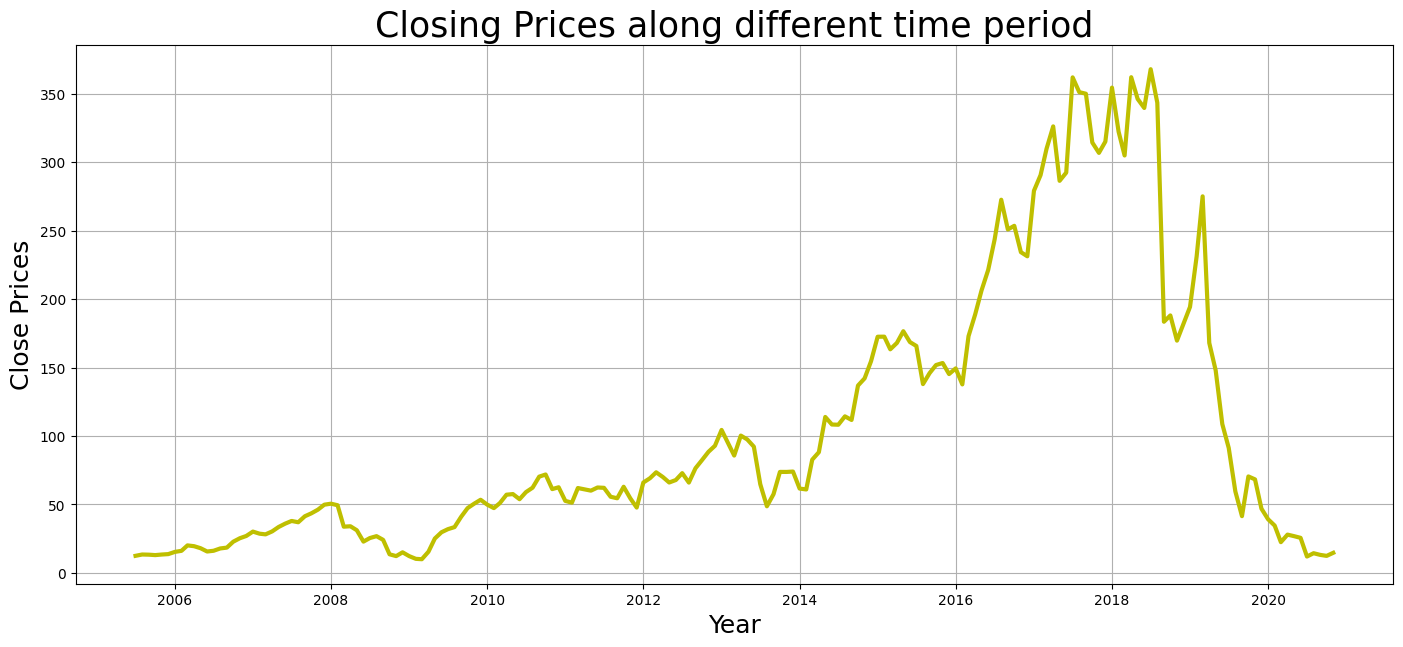

In [ ]:
# Visualisation of closing price with respect to dates.
plt.figure(figsize=(17,7))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Prices', fontsize=18)
plt.plot(bank_df['Date'], bank_df['Close'],linewidth=3,color='y')
plt.title('Closing Prices along different time period', fontsize=25)
plt.grid()
plt.show()


Note :  2018 onwards the closing stock prices have witnessed a downfall and the reason can be the fraud case.

# Checking the Outlier

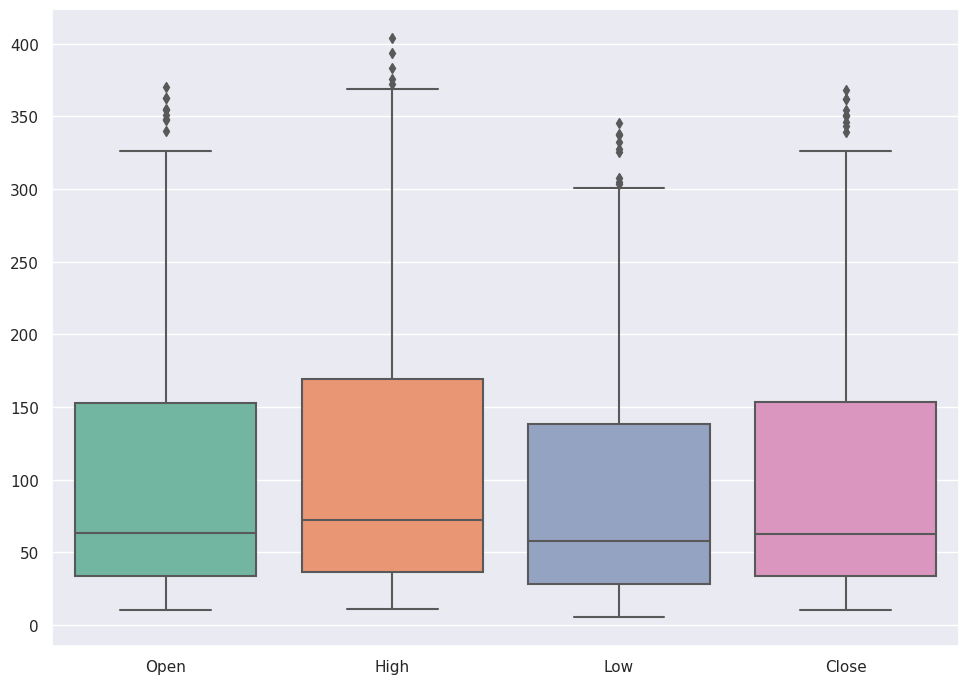

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=bank_df, orient="v", palette="Set2")

As we can see that there are outliers present and we will be handling it in our further analysis.

## UNIVARIATE ANALYSIS : 

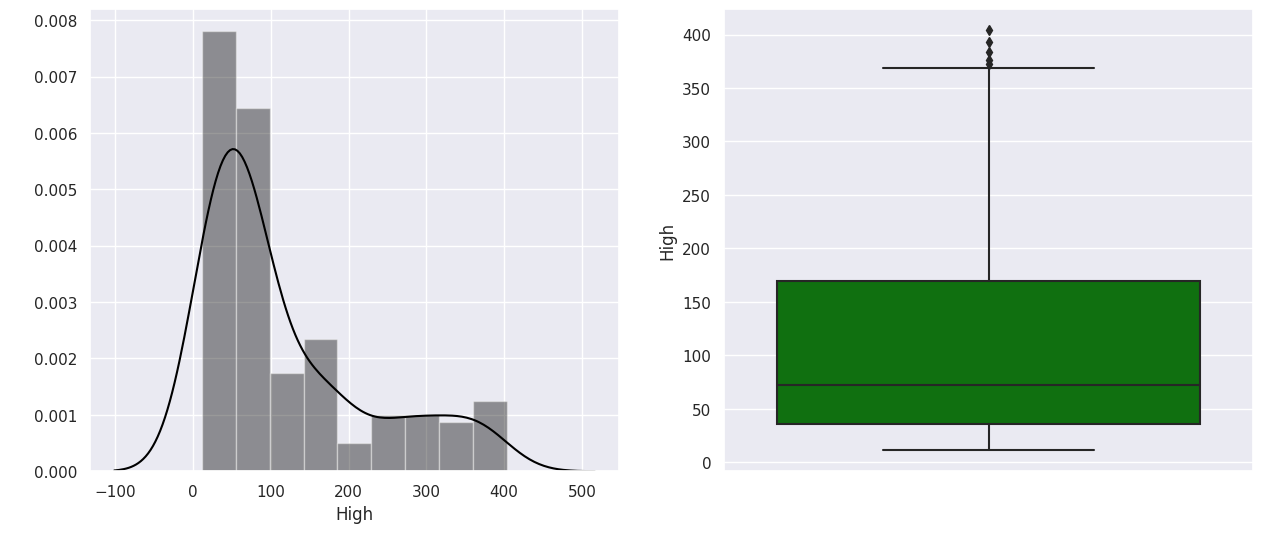

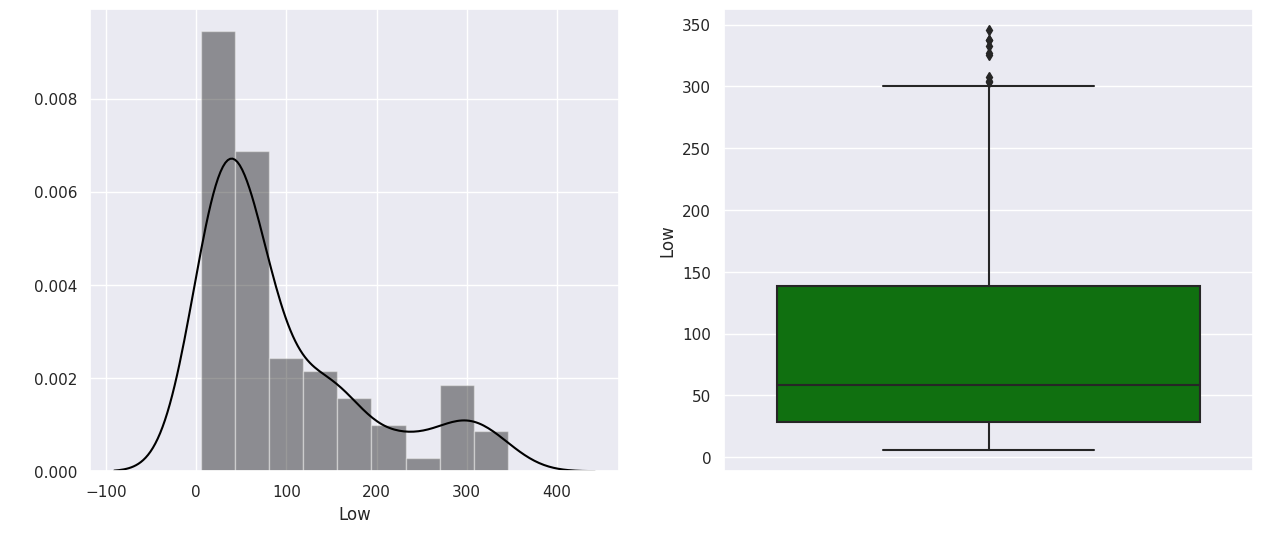

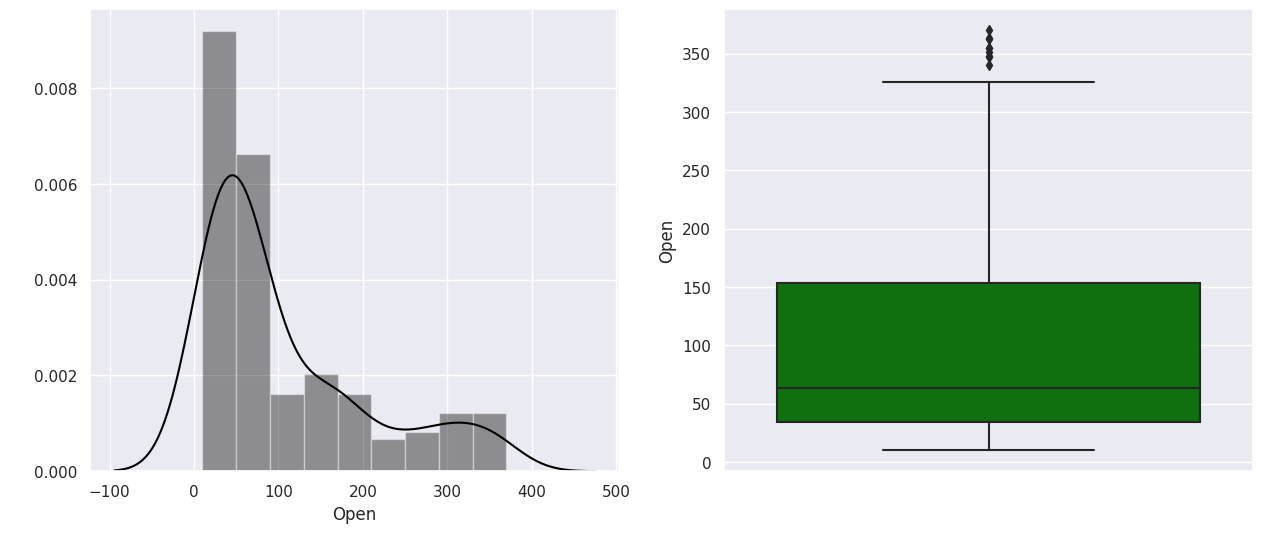

In [ ]:
# Visualisation of skewness of the  dataset.
for i in X:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(bank_df[i].dropna(), color = 'black')
    fig.set_ylabel(' ')
    fig.set_xlabel(i)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=bank_df[i], color = 'green')
    fig.set_title('')
    fig.set_ylabel(i)


Text(0, 0.5, 'Open')

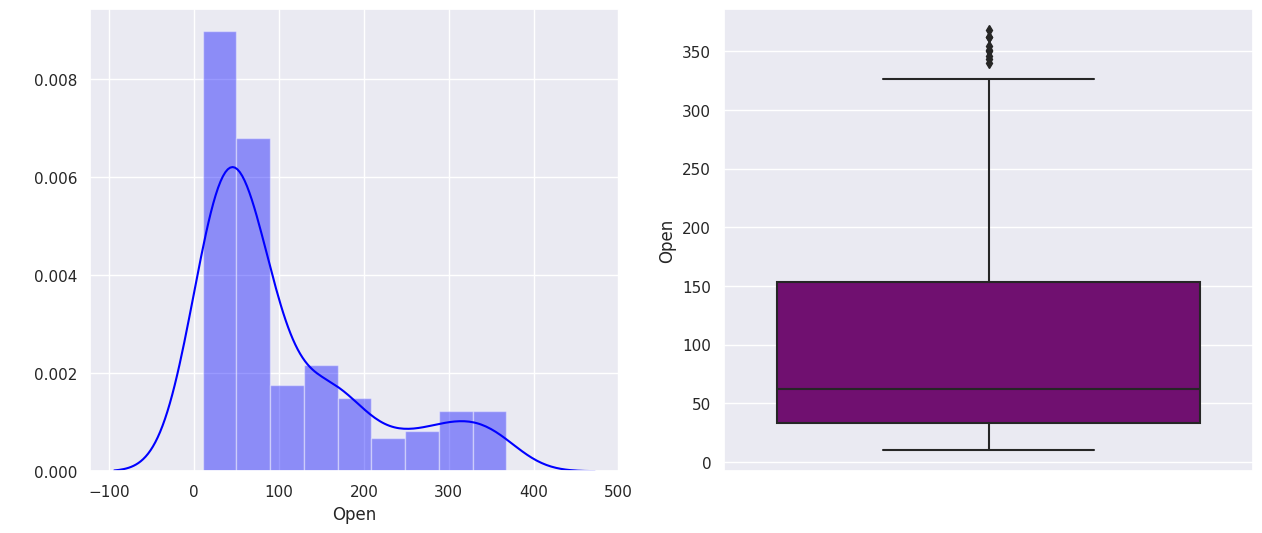

In [ ]:
# Visualisation of skewness of the dependent variable dataset.


plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(bank_df['Close'].dropna(), color = 'blue')
fig.set_ylabel(' ')
fig.set_xlabel(i)

plt.subplot(1, 2, 2)
fig = sns.boxplot(y=bank_df['Close'], color = 'purple')
fig.set_title('')
fig.set_ylabel(i)

# Note : The skewness is positive as you see the tail on the right side of the distribution.
Both variable in dataset looks positively skewed.

We will be performing Log transformation to treat this skewness.

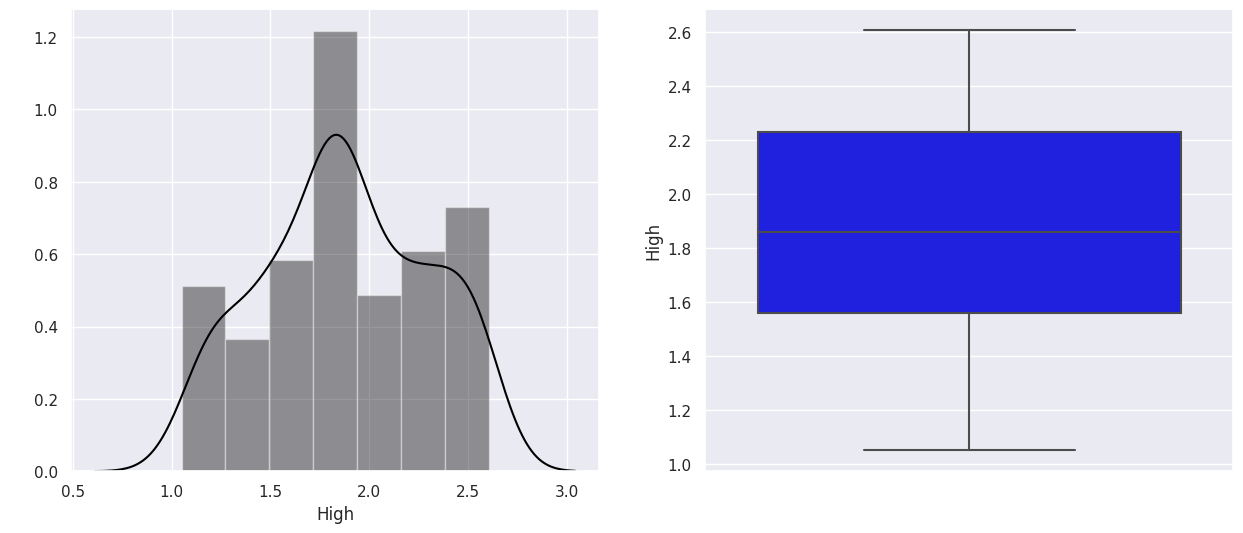

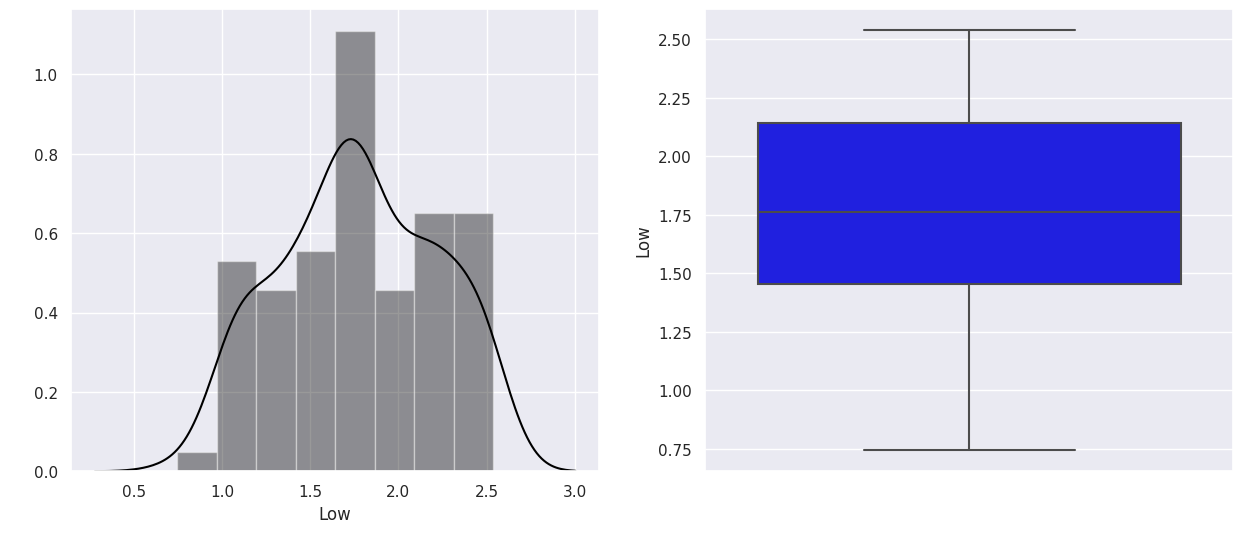

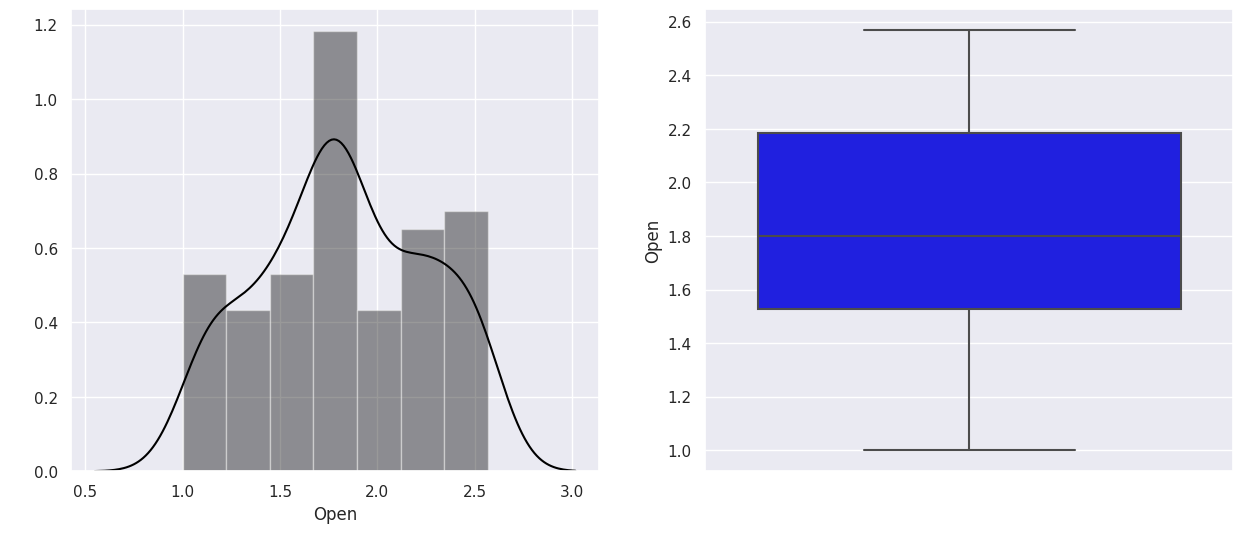

In [ ]:
# log Transformation of Independent variable : 

for var in X:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(bank_df[var]),color = 'black')
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(bank_df[var]), color = 'blue')
    fig.set_title('')
    fig.set_ylabel(var)

## Note :  dataset now seems to be normally dirtributed a bit after log transformation.

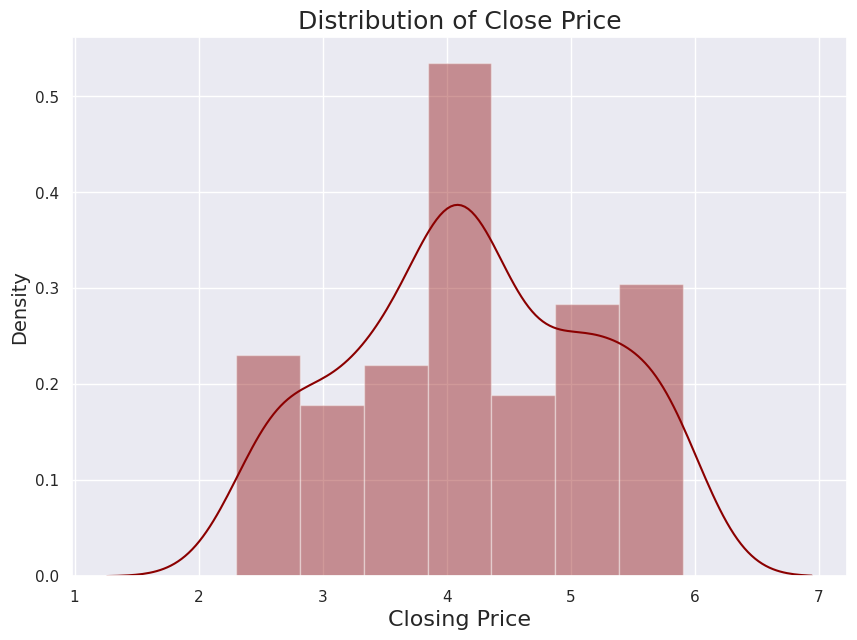

In [ ]:
# log Transformation of Dependent variable : 

plt.figure(figsize = (10,7))
sns.distplot(np.log(bank_df['Close']), color = 'darkred')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

### Note :  dataset now seems to be normally dirtributed a bit after log transformation.

### BIVARIATE ANALYSIS : 

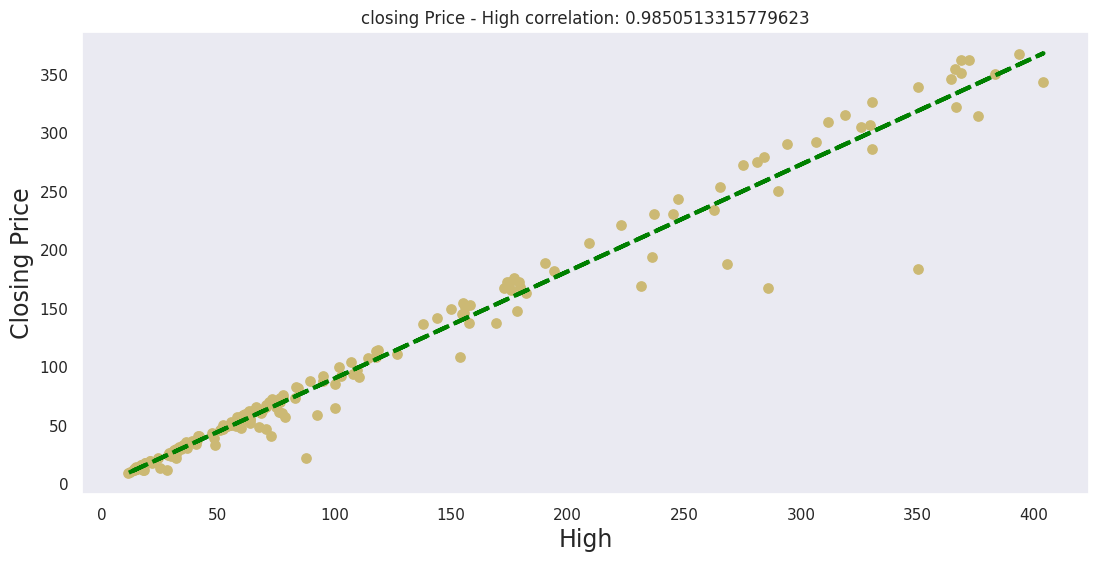

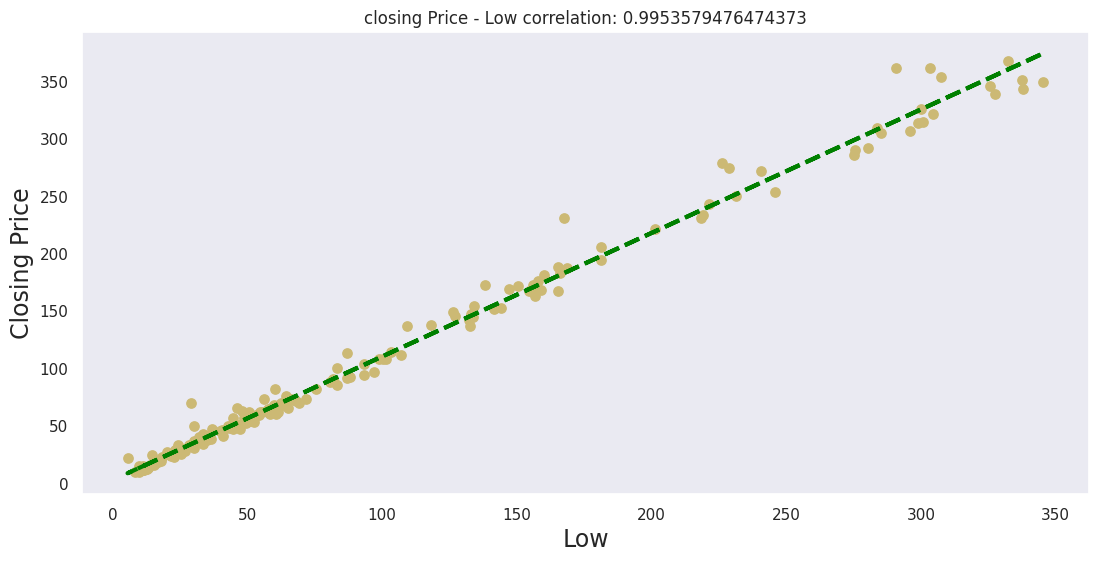

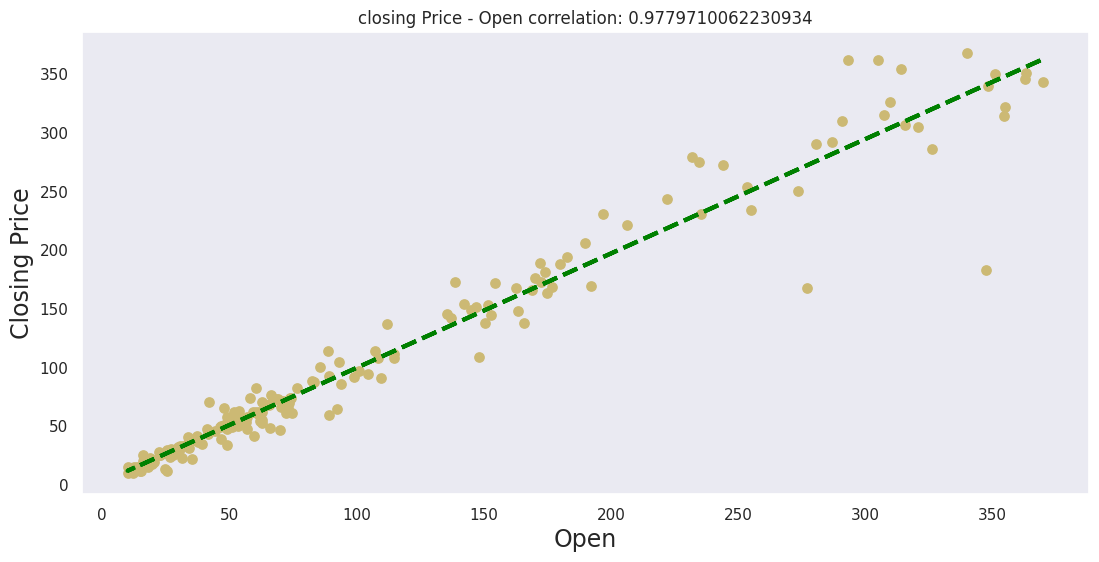

In [ ]:
# Bivariate analysis.
for labels in X:
  
   fig = plt.figure(figsize=(13,6))
   ax = fig.gca()
   feature = bank_df[labels]
   label = bank_df['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label,s=45,color='y')
   plt.xlabel(labels,fontsize=17)
   plt.ylabel('Closing Price',fontsize=17)
   ax.set_title('closing Price - ' + labels + ' correlation: ' + str(correlation))
   z = np.polyfit(bank_df[labels], bank_df['Close'], 1)
   y_hat = np.poly1d(z)(bank_df[labels])
 
   plt.plot(bank_df[labels], y_hat, "r--", lw=3,color = 'green')
   plt.grid()


plt.show()

Note : Each of the independent variable is highly correlated to the dependent variable.

## Multicollinearity
# Now, we will see the correlation between all the features in our data set

<Axes: >

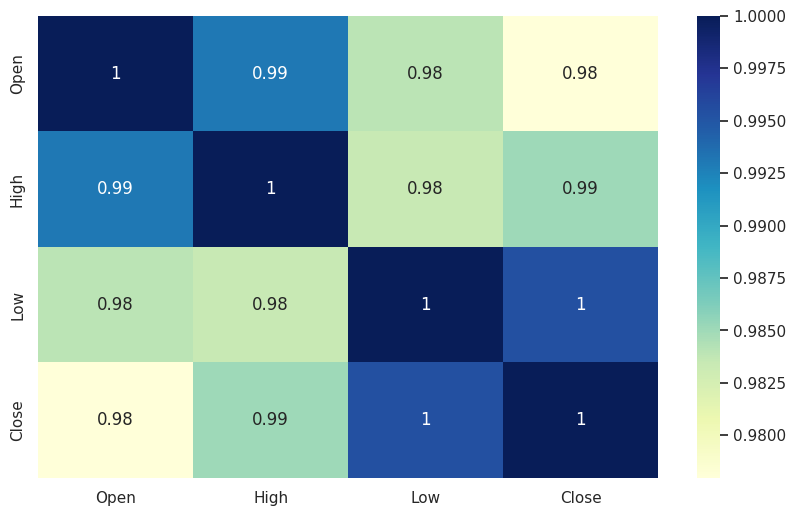

In [ ]:
# let's find all feature's correlation with Heatmap
# correlation
plt.figure(figsize=(10,6))
correlation = bank_df.corr()
sns.heatmap(abs(correlation), annot = True, cmap='YlGnBu')

Note :  All variables are showimg the highest correlation among them

## Variance Inflation Factor (VIF) values of Independent Variables

## **Variance inflation factor (VIF)** is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

In [ ]:
# Function building for calculating VIF : 

def calculate_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)

calculate_vif(bank_df[[i for i in bank_df.describe().columns if i not in ['Date', 'Close']]])


,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


Even though we have high VIF scores, we will not be performing any kind of feature engineering because for this particular use case, each feature is important. In the real world, most indicators are taken into account each of these features to predict future values

# MODEL IMPLEMENTATION : 

In [ ]:
# Dataframe to store metrics.
i = 0
eval_metrics = pd.DataFrame()

In [ ]:
eval_metrics

""


In [ ]:
# we will split the dataset into train and test data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20 , random_state = 1 )

In [ ]:
# shape of the training data
X_train.shape

(148, 3)

In [ ]:
# shape of test data
X_test.shape

(37, 3)

In [ ]:
# we will scaling the data

scale = MinMaxScaler()

X_train = scale.fit_transform(X_train)

X_test = scale.transform(X_test)

# 1. Linear Regression 

In [ ]:
# Intializing and fitting the model

regressor = LinearRegression()

model = regressor.fit(X_train, Y_train)

In [ ]:
model.coef_

array([ 206.39223501,  339.75965241, -178.58396386])

In [ ]:
model.intercept_

7.981643192931017

In [86]:
# Predicting on our test data

y_pred = model.predict(X_test)

y_pred

array([ 26.5264613 ,  30.04697913,  52.99506974,  14.74919015,
       147.01000347, 339.97588471,  47.57404618,  26.7156191 ,
        25.53891247,  51.5485512 , 167.1168406 ,  52.40492841,
        15.03278394, 317.19036116,  74.02532594,  48.98214465,
        28.10792019, 134.70037858, 106.16190122,  90.75305749,
        28.99576342,  15.52145954, 108.22518038,  58.74416284,
       165.96721099,  19.27101903,  15.01972066,  51.82026038,
        30.42231711,  62.47316615, 261.58897929, 338.47373229,
        65.29568021, 232.0096057 ,  95.84913545,  54.02351579,
       242.48451636])

In [87]:
train_score = model.score(X_train, Y_train) * 100

print(f'The train data accuracy is {train_score}')

The train data accuracy is 99.4394712470491


In [ ]:
test_score = model.score(X_test, Y_test)*100

print(f'The test data accuracy is {test_score}')

The test data accuracy is 99.78412541225983


### Evaluation of the model :

In [88]:
# Evaluation metrics.
MSE  = mean_squared_error((Y_test), (y_pred))
print("MSE :" , MSE)

MAE=mean_absolute_error((Y_test), (y_pred))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R_squared = r2_score((Y_test), (y_pred))
print("R_squared :" ,R_squared)

MSE : 19.988578593595022
MAE : 3.052764712964646
RMSE : 4.470858820584142
R_squared : 0.9978412541225983


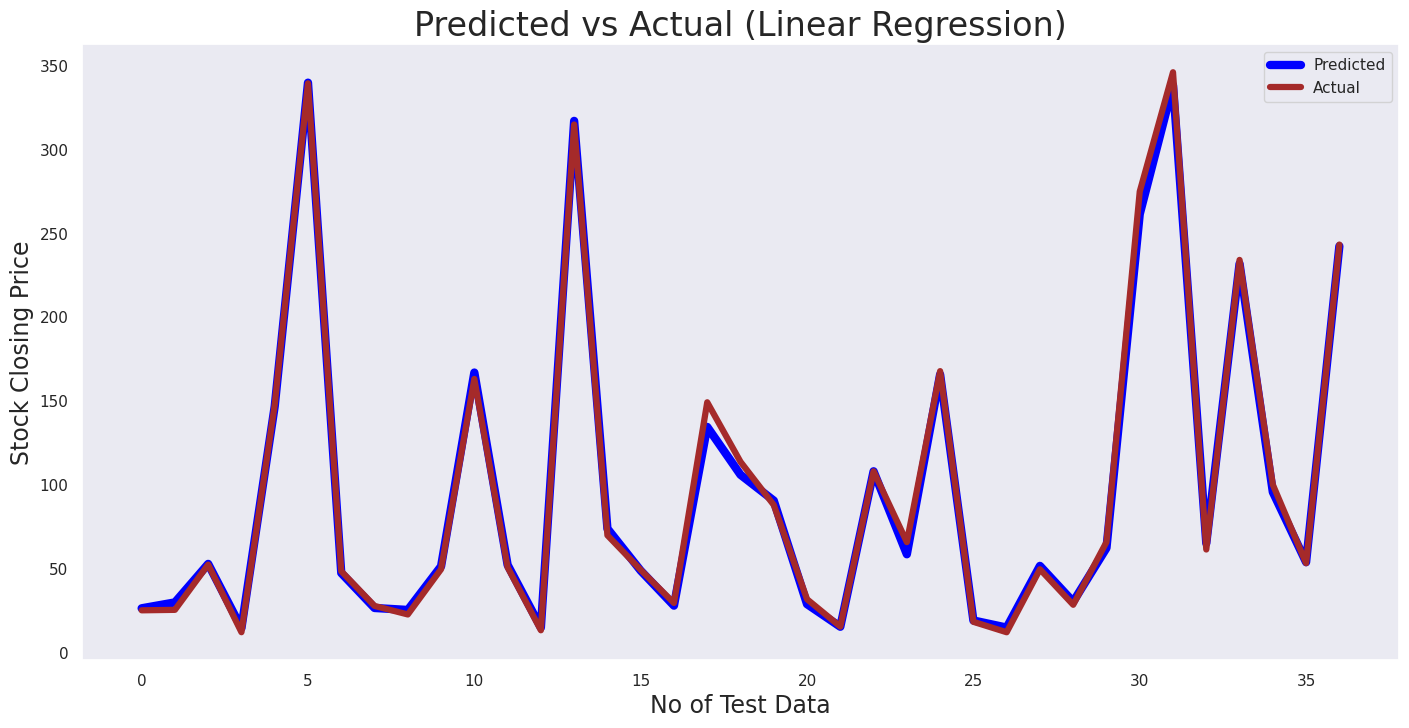

In [89]:
#  Visualisation of the difference between predicted output and actual value

plt.figure(figsize=(17,8))
plt.plot(y_pred,color='blue',linewidth=6)
plt.plot(np.array(Y_test),color='brown',linewidth=4.5)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (Linear Regression)',fontsize=24)
plt.grid()
plt.show()

Hence we can say our model is performing well and giving good predicted value.

In [ ]:
# Inserting Linear Regression evaluation metrics into the dataframe.
eval_metrics.loc[i,"Model_Name"]='Linear regression'
eval_metrics.loc[i,"MSE"]=round(MSE,4)
eval_metrics.loc[i,"MAE"]=round(MAE,2)
eval_metrics.loc[i,"RMSE"]=round(RMSE,4)
eval_metrics.loc[i,"R_squared"]=round(R_squared,4)

i+=1

# 2. Lasso Regression

In [ ]:
#  Lasso Regression algorithm.

lasso = Lasso(alpha = 0.0001, max_iter = 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
# Checking the training accuracy.

lasso_train_Accu = lasso.score(X_train, Y_train) * 100

print(f'The training data accuracy of the dataset is {lasso_train_Accu}')


The training data accuracy of the dataset is 99.43947120445368


In [ ]:
#  we will be doing cross validation

lasso = Lasso()
parameter = {"alpha": [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameter, scoring = "neg_mean_squared_error", cv = 5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
# checking the best parameter for the model by Lasso regressor

print(f'The best fit alpha value is {lasso_regressor.best_params_}')

print(f'using {lasso_regressor.best_params_} the negative mean squared error is {lasso_regressor.best_score_}')

The best fit alpha value is {'alpha': 0.01}
using {'alpha': 0.01} the negative mean squared error is -62.900491725606194


In [ ]:
# predicted value of dependent variable

y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso

array([ 26.45227112,  30.04850643,  53.33208085,  14.78057187,
       147.20056836, 340.97247569,  47.96364444,  26.55136613,
        25.73615877,  51.66790148, 167.49801971,  52.43232454,
        15.12465939, 317.5789784 ,  74.22037783,  49.12229901,
        28.0595913 , 135.10769444, 105.35531379,  90.60463345,
        29.0572796 ,  15.68110511, 108.39862095,  58.2363886 ,
       166.11471701,  19.36746954,  15.05294715,  51.72565045,
        30.51061223,  62.82040547, 260.46775217, 339.6932164 ,
        65.62269946, 232.73520487,  95.52680657,  54.06080359,
       242.10491476])

In [ ]:
# Evaluation metrics.

MSE  = mean_squared_error((Y_test), (y_pred_lasso))
print("MSE :" , MSE)

MAE=mean_absolute_error((Y_test), (y_pred_lasso))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R_squared = r2_score((Y_test), (y_pred_lasso))
print("R_squared :" ,R_squared)
     

MSE : 20.878651216190214
MAE : 3.1308568938605057
RMSE : 4.569316274475889
R_squared : 0.9977451271971334


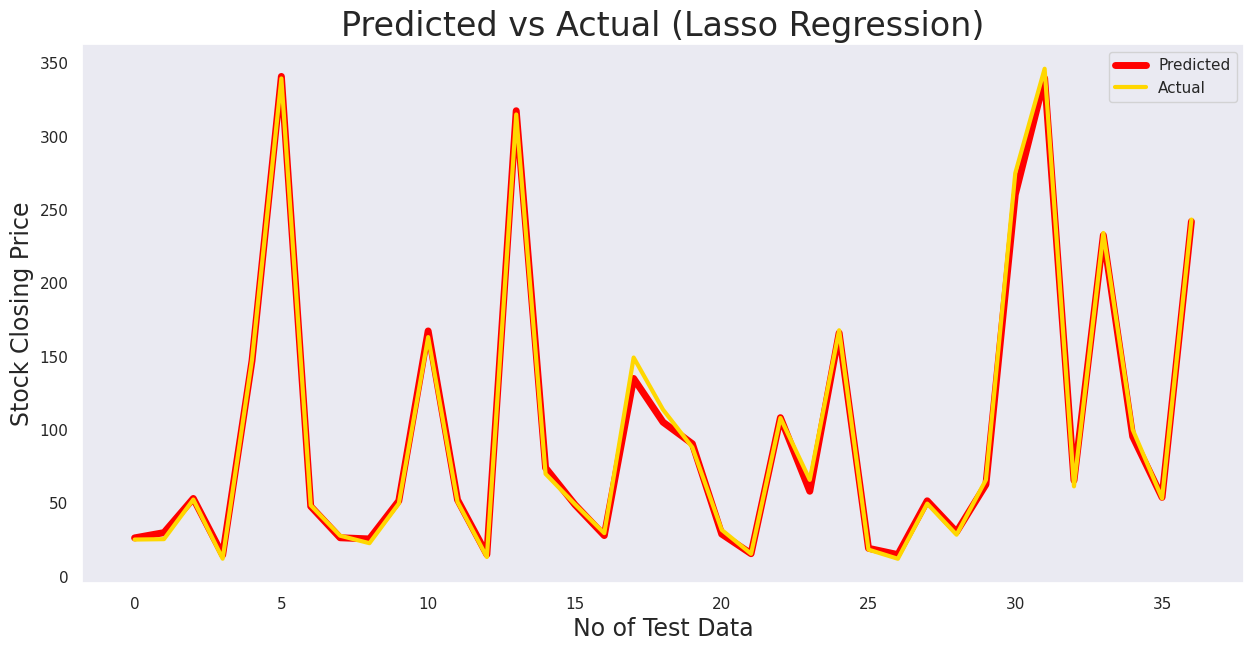

In [ ]:
# Lets visualize the actual vs predicted value :

plt.figure(figsize = (15,7))
plt.plot(y_pred_lasso, color = "red", linewidth = 5)
plt.plot(np.array(Y_test), color = "gold", linewidth = 3)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (Lasso Regression)',fontsize=24)
plt.grid()
plt.show()

Hence we can say our model is performing well and giving good predicted value.

 y_pred_lasso = Predicted values

 Y_test = Actual values

In [ ]:
# Inserting Lasso Regression evaluation metrics into the dataframe.
eval_metrics.loc[i,"Model_Name"]='Lasso regression'
eval_metrics.loc[i,"MSE"]=round(MSE,4)
eval_metrics.loc[i,"MAE"]=round(MAE,2)
eval_metrics.loc[i,"RMSE"]=round(RMSE,4)
eval_metrics.loc[i,"R_squared"]=round(R_squared,4)

i=i+1

# 3. Ridge Regression

In [ ]:
#  fitting the model
ridge = Ridge(alpha = 0.1)

ridge.fit(X_train, Y_train)



Ridge(alpha=0.1)

In [ ]:
# checking the train data accuracy
ridge_train_accu = ridge.score(X_train, Y_train) * 100

print(f'the train data accuracy is {ridge_train_accu}')

the train data accuracy is 99.20836705746655


In [ ]:
# lets do cross validation
ridge = Ridge()
params = {"alpha": [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}

ridge_regressor = GridSearchCV(ridge, params, scoring = "neg_mean_squared_error",cv = 3)

ridge_regressor.fit(X_train, Y_train)


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
#  checking the best fit parameter for the model

print(f'The best fit alpha value of ridge regressor is {ridge_regressor.best_params_}')
print(f"when we use {ridge_regressor.best_params_} the neg_mean_squared_error is {ridge_regressor.best_score_}")

The best fit alpha value of ridge regressor is {'alpha': 0.001}
when we use {'alpha': 0.001} the neg_mean_squared_error is -59.333737891185


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

y_pred_ridge

array([ 26.51556085,  30.04595288,  53.04659891,  14.7554648 ,
       147.05215266, 340.08074796,  47.64416552,  26.69434114,
        25.57053221,  51.56547987, 167.16468968,  52.40211766,
        15.04266342, 317.20570217,  74.04539094,  49.00109585,
        28.10149502, 134.7562793 , 106.05107857,  90.72634438,
        29.005581  ,  15.54500684, 108.24252946,  58.67621805,
       165.97432414,  19.28182688,  15.02651101,  51.80360735,
        30.43342611,  62.52220894, 261.42444088, 338.62675226,
        65.34483905, 232.1138318 ,  95.79986757,  54.02405232,
       242.4073673 ])

In [ ]:
# Evaluation metrics.
MSE  = mean_squared_error((Y_test), (y_pred_ridge))
print("MSE :" , MSE)

MAE=mean_absolute_error((Y_test), (y_pred_ridge))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R_squared = r2_score((Y_test), (y_pred_ridge))
print("R_squared :" ,R_squared)

MSE : 20.095425485603723
MAE : 3.061022460686161
RMSE : 4.482792152844444
R_squared : 0.9978297147684337


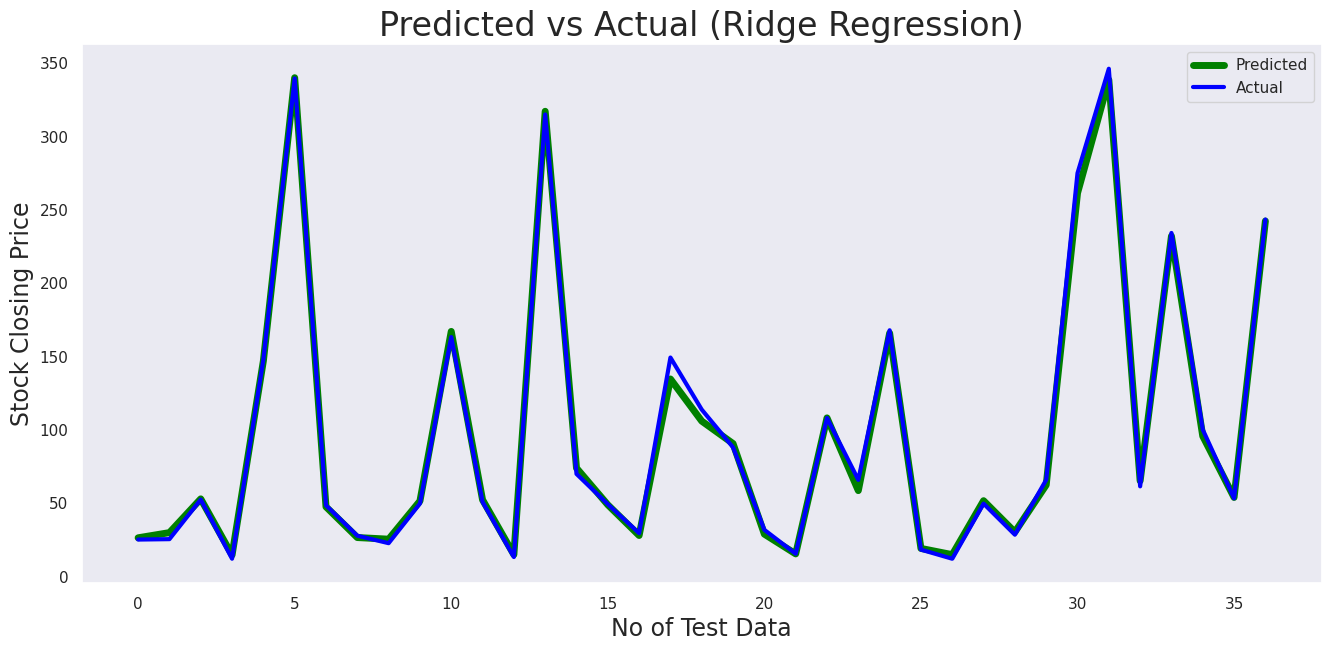

In [ ]:
# we will visualize the actual vs predicted values

plt.figure(figsize = (16,7))
plt.plot(y_pred_ridge , color = "green", linewidth = 5)
plt.plot(np.array(Y_test), color = "blue", linewidth = 3)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (Ridge Regression)',fontsize=24)
plt.grid()
plt.show()

Hence we can say our model is performing well and giving good predicted value.

In [ ]:
# Inserting Ridge Regression evaluation metrics into the dataframe.
eval_metrics.loc[i,"Model_Name"]='Ridge regression'
eval_metrics.loc[i,"MSE"]=round(MSE,4)
eval_metrics.loc[i,"MAE"]=round(MAE,2)
eval_metrics.loc[i,"RMSE"]=round(RMSE,4)
eval_metrics.loc[i,"R_squared"]=round(R_squared,4)

i=i+1

## 4 . XG Boost Regressor

### Since Xgboost is a black box technique and has a lot of inbuilt functions, we will put untransformed data through it.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

In [ ]:
xgb = XGBRegressor()

xgb.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xgb_train_accu = xgb.score(x_train, y_train)

xgb_train_accu

0.9999999216237699

In [ ]:
y_pred_xgb = xgb.predict(x_test)

y_pred_xgb

array([ 21.943342,  27.476244,  55.615997,  14.902056, 151.81287 ,
       338.83667 ,  49.26802 ,  25.444746,  28.545855,  51.274128,
       167.41655 ,  49.332638,  13.490636, 312.49185 ,  70.219246,
        50.090137,  27.847084, 142.15129 , 104.95897 ,  89.198845,
        27.786068,  15.713822, 109.026566,  54.68825 , 170.84943 ,
        19.68434 ,  14.902056,  50.564415,  30.24596 ,  58.3226  ,
       271.62595 , 343.929   ,  74.17403 , 215.28305 ,  91.29405 ,
        57.322475, 237.21718 ], dtype=float32)

In [ ]:
#evaluation metrics
MAE=mean_absolute_error((Y_test), (y_pred_xgb))
print("MAE :" ,MAE)

MSE  = mean_squared_error((Y_test), (y_pred_xgb))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)



MAE : 3.882457881618191
MSE : 30.990001427139017
RMSE : 5.5668663920682535


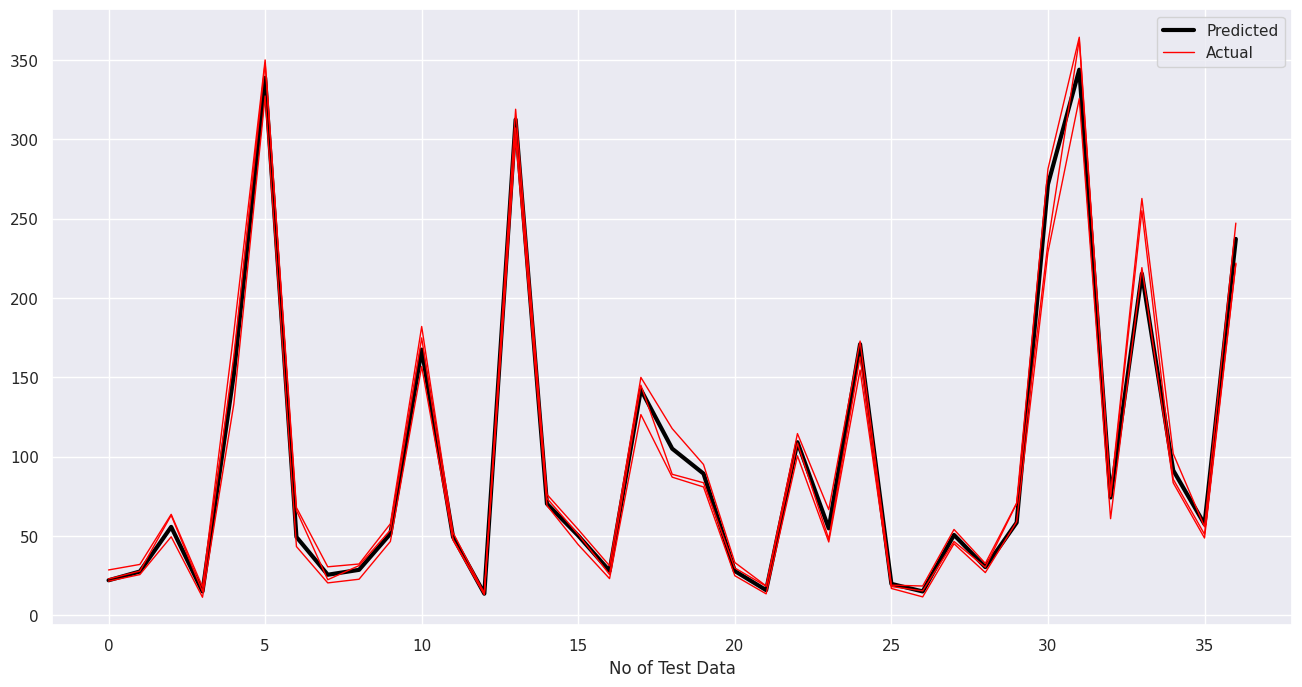

In [ ]:
# visualization

plt.figure(figsize = (16,8))
plt.plot(y_pred_xgb, color = "black", linewidth = 3)
plt.plot(np.array(x_test), color = "red", linewidth = 1)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

Hence we can say our model is performing well and giving good predicted value.

In [ ]:

#Inserting errors in dataframe
eval_metrics.loc[i,"Model_Name"]='XGBoost regressor'
eval_metrics.loc[i,"MAE"]=round(MAE,2)
eval_metrics.loc[i,"MSE"]=round(MSE,2)
eval_metrics.loc[i,"RMSE"]=round(RMSE,2)


i=i+1

## METRICS COMPARISION

We will now compare performance of all the regression models-

In [ ]:
#  Sorting the eval_metrics table in ascending manner based on value of MSE

sorted_metrics = eval_metrics.sort_values(by = ["MSE"], ascending = True)

In [90]:
sorted_metrics

,Model_Name,MSE,MAE,RMSE,R_squared
0,Linear regression,19.9886,3.05,4.4709,0.9978
2,Ridge regression,20.0954,3.06,4.4828,0.9978
1,Lasso regression,20.8787,3.13,4.5693,0.9977
3,XGBoost regressor,30.9900,3.88,5.5700,NaN


we can conclude that Linear regression having lowest MSE, MAE & RMSE has performed well than all other models

In [ ]:
# visualization

plt.figure(figsize = (16,8))
plt.plot(y_pred_xgb, color = "black", linewidth = 3)
plt.plot(np.array(x_test), color = "red", linewidth = 1)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# Actual vs Predicted Closing Price values by various Models

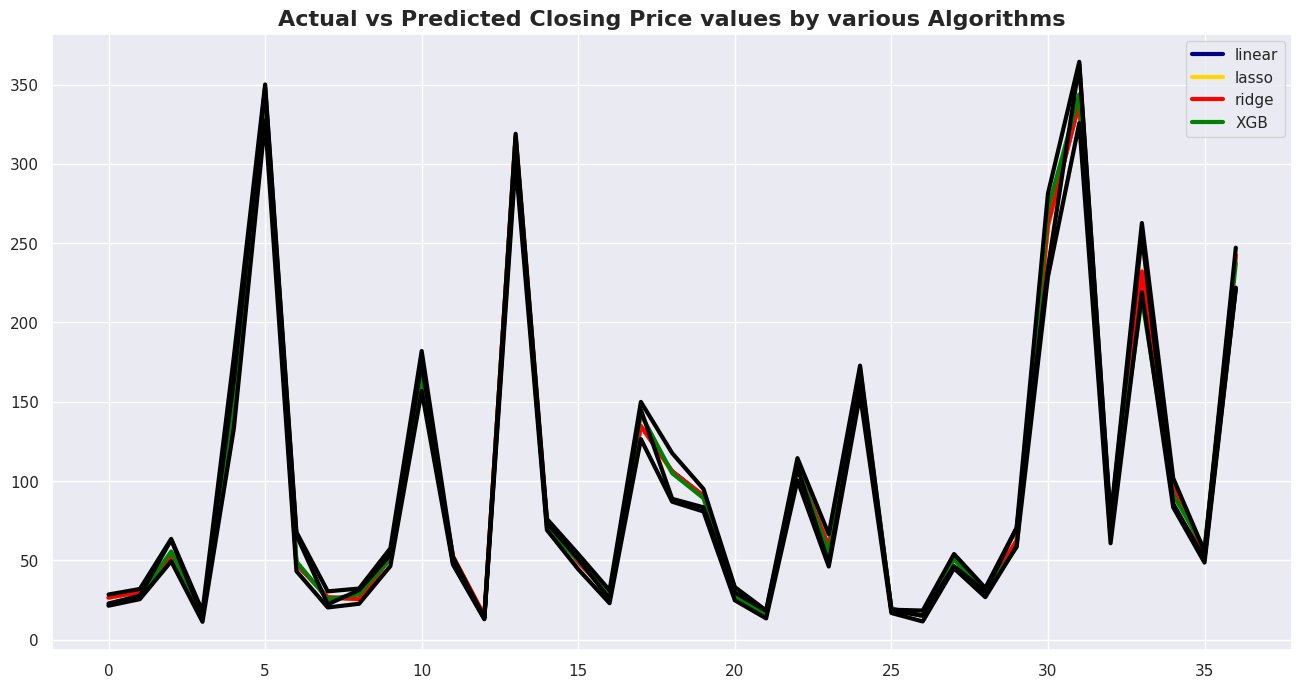

In [ ]:
# Visualising the comparison of actual value vs predicted value for all the models.

plt.figure(figsize=(16,8))
plt.plot(y_pred, color = "navy", linewidth = 3)
plt.plot(y_pred_lasso, color = "gold", linewidth=3)
plt.plot(y_pred_ridge, color = "red", linewidth = 3)
plt.plot(y_pred_xgb, color = "green", linewidth=3)
plt.plot(np.array(x_test), color = "black", linewidth = 3)

plt.legend(['linear','lasso','ridge','XGB'])
plt.title('Actual vs Predicted Closing Price values by various Algorithms', weight = 'bold',fontsize=16)
plt.show()


as we can see all the models has given approx same predicted values and and has similiar pattern.

# CONCLUSION



*   Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.
*   After loading the dataset, we found that there are no null values in our dataset nor any duplicate data.












*   There are some outliers in our features however this being a very small dataset, dropping those instances will lead to loss of information.
*  We found that the distribution of all our variables is positively skewed. so we performed log transformation on them.





*   There is a high correlation between the dependent and independent variables. This is a signal that our dependent variable is highly dependent on our features and can be predicted accurately from them.
*   We found that there is a rather high correlation between our independent variables. This multicollinearity is however unavoidable here as the dataset is very small.





*  we concluded that Linear regression having lowest MSE, MAE & RMSE has performed well than all other models.
*  The accuracy for each model is more than 95%





*   As we know that, lasso regression automatically selects only those features that are useful and hence discarded some features when applied , whereas in this case all the features were important for prediction purpose so it ended up without meeting our expectation in terms of accuracy.


